In [1]:
%autosave 300

Autosaving every 300 seconds


# Исследование объявлений о продаже квартир

В нашем распоряжении данные архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования**:
    
1. Подготовить данные для возможности проведения дальнейшего исследования.
    
2. Рассчитать дополнительные параметры на основе исходных данных.
    
3. Провести исследовательский анализ зависимостей стоимости квартир от различных факторов.
    

    
**Ход исследования:** 
Для начала надо будет импортировать и совершить обзор исходных данных: понять, сколько и каких значений/пропусков содержится в таблице.
    
Затем будет производится предобработка данных, включая в себя заполнение/удаление пропусков, дубликатов, корректировка аномальных значений.
    
После будут произведены дополнительные расчёты (цена за кв.м., день, месяц и год публикации объявления, тип этажа, расстояние до центра в км), а результаты добавлены в таблицу с исходными данными.
    
И в конце будет произведён исследовательский анализ данных на тему зависимости стоимости квартиры от различных параметров.

### Откройте файл с данными и изучите общую информацию. 

#### 1. Загрузка данных из файла в датафрейм

In [2]:
#импорт библиотеки pandas
import pandas as pd
#параметр для отображения всех колонн в выводимых таблицах
pd.set_option('display.max_columns', None)
#импорт библиотеки matplotlib
import matplotlib.pyplot as plt

try:
    #сохранение пути к файлу в переменную path для ревью
    path='/datasets/real_estate_data.csv'
    #загрузка данных из файла в датафрейм
    data=pd.read_csv(path)
except:
    #сохранение пути к файлу в переменную path для работы
    path=r'C:\Users\garsh\OneDrive\Рабочий стол\Обучение\Практикум\Спринт 3\Проект (Недвижимость)\real_estate_data.csv'
    #загрузка данных из файла в датафрейм
    data=pd.read_csv(path)

#### 2. Изучение общей информации о полученном датафрейме.

In [3]:
#Вывод первых 5 строк датафрейма на экран
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Из полученного видно, что с данными что-то не так: значения всех столбцов слилились в одну ячейку. 
Проверю при помощи функции shape:

In [4]:
#Получение информации о количестве строк и столбцов датафрейма
data.shape

(23699, 1)

В датафрейме 23699 строк и 1 столбец. Кажется, что-то не так с разделителем: состоит из 2 символов: '\t'. Загрузим данные из файла снова, указав в методе read_csv соответствуюзий знак разделения.

In [5]:
#загрузка данных из файла в датафрейм с указанием разделителя
data=pd.read_csv(path,sep='\t')

#вывод первых 5 строк на экран
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#Получение информации о количестве строк и столбцов датафрейма
data.shape

(23699, 22)

In [7]:
#Получение общей информации о данных с указанием параметра include для отображения всех столбцов
data.describe(include='all')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,23699,23699,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,23550,23632,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,NaN,NaN,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,NaN,NaN,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,NaN,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,NaN,NaN,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,NaN,NaN,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,NaN,NaN,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


#### 3.Построение общей гистограммы для всех числовых столбцов таблицы

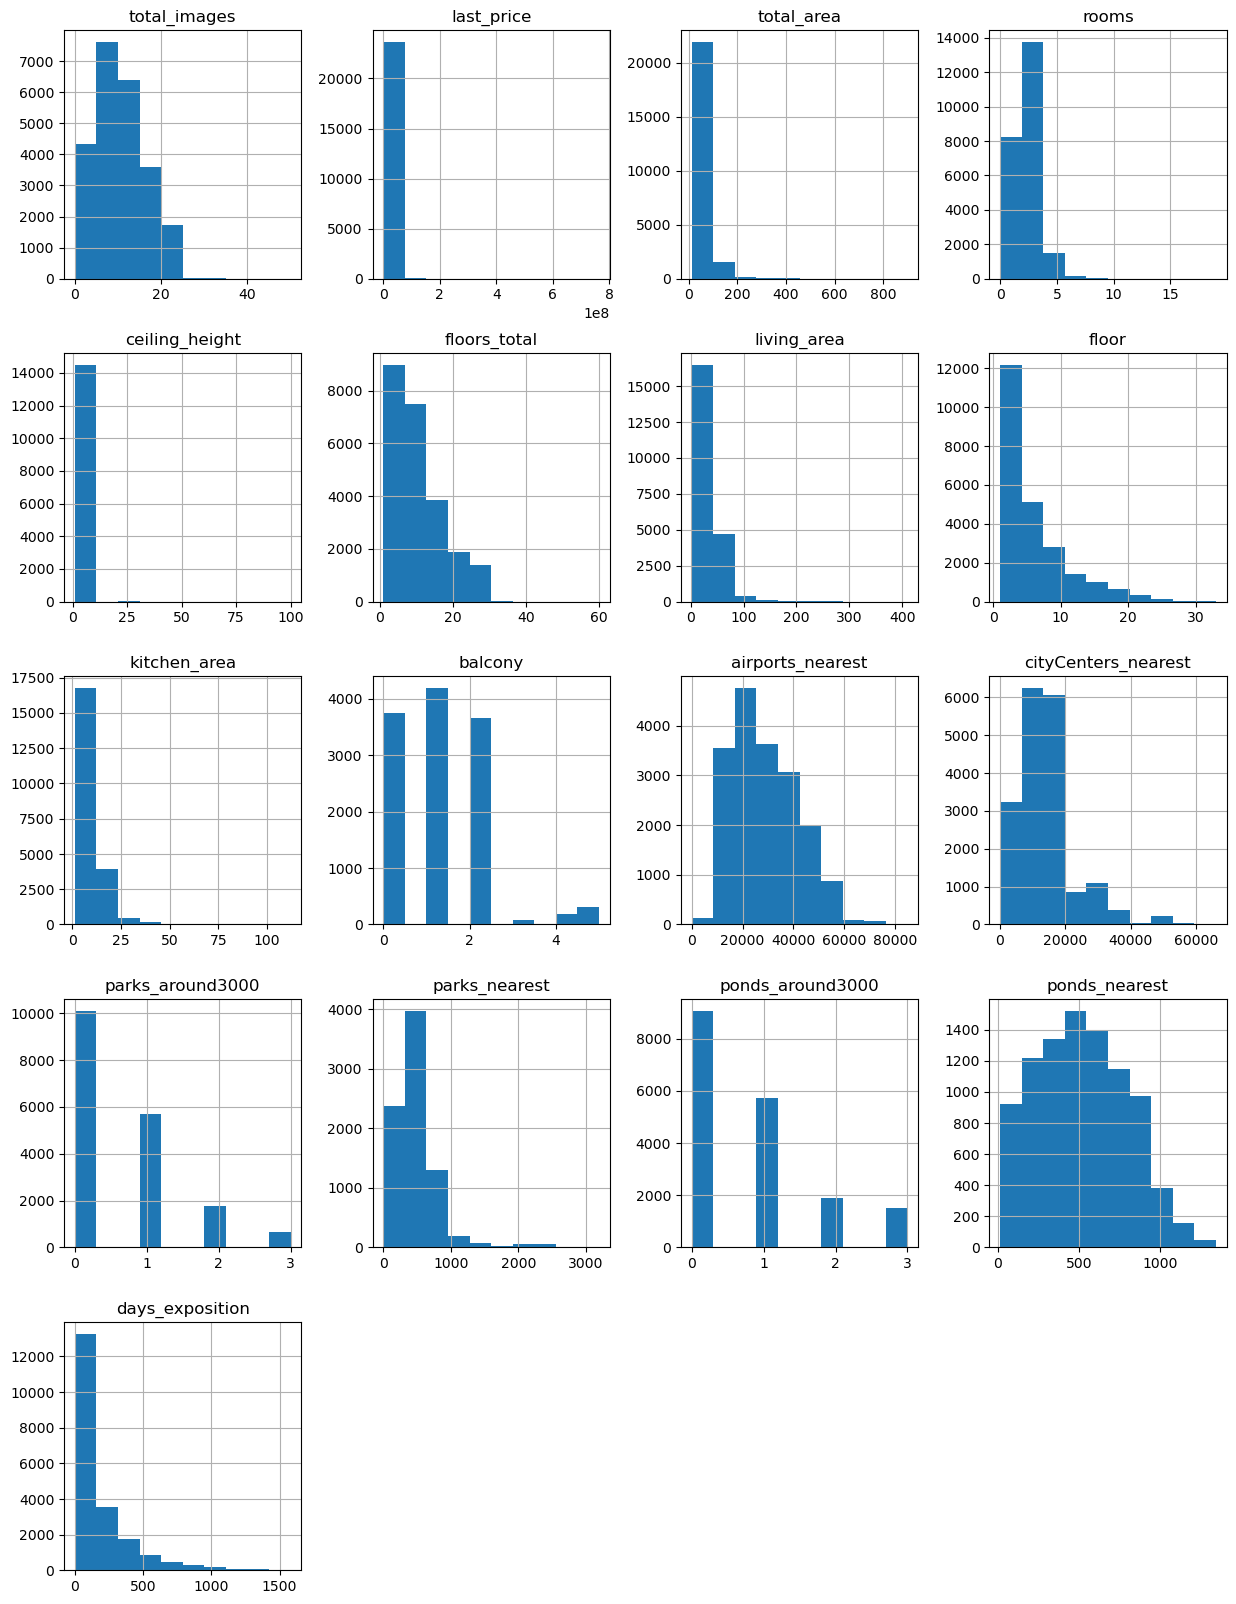

In [8]:
#Построение общей гистограммы методом hist с размером гистограмм 15х20 дюймов
data.hist(figsize=(15,20));

### Предобработка данных

#### 1.Нахождение и изучение пропущенных значений в столбцах

In [9]:
#Получение общей информации о данных методом info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Проверить колличество пропусков в % можно вот так: 
    
    
    pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

In [10]:
#подсчёт числа пропусков в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Из результата видно: так как строк всего 23699, то пропуски есть в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_earest, parks_arount3000, parks_nearest, ponds_around3000, pond_nearest, days_exposition.

   
Дополнительно рассчитав процентное содержание пропусков в столбцах, можно утверждать, что наибольшее число пропусков  содержится в столбцах is_apartment, parks_nearest, ponds_nearest, balcony, ceiling_height. Значит в дальнейшем следует отнестись к этим пропускам с особым вниманием.


##### Заполнение пропусков в столбце 'ceiling_height' (высота потолков, м)
Пропуски в данном столбце необходимо заполнить значением: в каждой квартире должно быть своё значение высоты потолка. 
Заполнить можно двумя способами: средним или медианным значением.
Так как при просмотре информации о данных методом describe видно, что максимальное значение в столбце - 100, (скорее всего ошибочное значение, но пока это неважно), то есть смысл заменить именно медианным значением, что исключает подобные большие выбросы в значениях.

In [11]:
#определение числа пропусков
len(data[data['ceiling_height'].isna()])

9195

In [12]:
#Заполнение пропусков методом fillna() медианным значением столбца
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

In [13]:
#проверка числа пропусков
len(data[data['ceiling_height'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'floors_total' (кол-во этажей в доме,шт)
Пропуски в данном столбце необходимо заполнить значением: в каждом доме должно быть своё значение количества этажей. 
Возможно число этажей не указано, так как человек, заполняющий исходные данные, мог подумать: "Если дом одноэтажный (а может ещё и частный многоквартирный), то число этажей указывать не нужно". 
Заполним пропуски в данном случае значением "1".

In [14]:
#определение числа пропусков
len(data[data['floors_total'].isna()])

86

In [15]:
#Заполнение пропусков методом fillna() значением "1"
data['floors_total']=data['floors_total'].fillna(1)

In [16]:
#проверка числа пропусков
len(data[data['floors_total'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально**

##### Заполнение пропусков в столбце 'living_area' (жилая площадь, м2)
Пропуски в данном столбце необходимо заполнить значением: в каждом доме должно быть своё значение величины жилой площади. 
Аналогично случаю с высотой потолков заполним пропуски медианным значением.

In [17]:
#определение числа пропусков
len(data[data['living_area'].isna()])

1903

In [18]:
#определение медианного значения по столбцу
data['living_area'].median()

30.0

Медианное значение по всему столбцу 30 м2, однако исходя из здравого смысла 3-х и 4-х комнатные квартиры с такой площадью представить сложно. Уточняем задачу: заполнить пропуски медианным значением площади, сгруппировав квартиры по числу комнат. (В столбце комнат пропусков нет, можно оперировать им спокойно)

In [19]:
#заполнение пропусков медианными значениями жилой площади по группам комнат при помощи метода transform()
data['living_area']=data.groupby('rooms')['living_area'].transform(lambda col: col.fillna(col.mean()))

In [20]:
#проверка числа пропусков
len(data[data['living_area'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'is_apartment' (апартаменты?, булев тип)
Пропуски в данном столбце необходимо заполнить значением: квартира моет либо быть из класса апартаментов, либо не может. 
Проверим соотношение количества апартаментов и не апартаментов.

In [21]:
#определение числа пропусков
len(data[data['is_apartment'].isna()])

20924

In [22]:
#определение соотношения количества апартаментов к количеству неапартаментов
len(data.query('is_apartment==True'))/len(data.query('is_apartment==False'))

0.01834862385321101

Можно предположить, что число апартаментов значительно меньше: сутя по заполненным данным, видно, что апартаментов в 20 раз меньше, чем не апаратаментов. Таким образом, можно заполнить пропуски значением False (то есть допускаем, что большинство квартир не являются апартаментами).

In [23]:
#Заполнение пропусков методом fillna() значением False
data['is_apartment']=data['is_apartment'].fillna(False)

In [24]:
#проверка числа пропусков
len(data[data['ceiling_height'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально(на вопрос: "апартаменты ли это?" человек то заполнял, что да - апартаменты, то нет - не апартаменты, то не заполнял, возможно, имя в виду что это не апартаменты), некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'kitchen_area' (площадь кухни, м2)
Пропуски в данном столбце имеют право на существование: возможно, в некоторых квартирах (например студиях) нет кухни. 
Для начала заменим все пропуски для студий на 0.

In [25]:
#определение числа пропусков
len(data[data['kitchen_area'].isna()])

2278

In [26]:
#заполнение площади кухонь равной нулю для студий
data.loc[data['studio']==True,'kitchen_area']=0

In [27]:
#проверка числа пропусков
len(data[data['kitchen_area'].isna()])

2129

Осталось 2129 пропусков. Аналогично можно заполнить пропуски для квартир со свободной планировкой (столбец open_plan).


In [28]:
#заполнение площади кухонь равной нулю для квартир со свободной планировкой
data.loc[data['open_plan']==True,'kitchen_area']=0

In [29]:
#проверка числа пропусков
len(data[data['kitchen_area'].isna()])

2062

В столбце остались пропуски. Есть смысл заполнить их медианным значением площади кухни: ведь если квартира не студия и не открытой планировки, то вполне вероятно, что кухня в ней всё-таки есть.

In [30]:
#Заполнение пропусков методом fillna() медианным значением столбца
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())

In [31]:
#проверка числа пропусков
len(data[data['kitchen_area'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально (не оформлена договоренность по заполнению размеров столбца если кухни нет или просто незаполнение столбца), некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'balcony' (число балконов, шт)
Пропуски в данном столбце имеют право на существование: не во всех квартирах есть балконы.
Такие пропуски есть смысл заменить на 0.


In [32]:
#определение числа пропусков
len(data[data['balcony'].isna()])

11519

In [33]:
#Заполнение пропусков методом fillna() нулевым значением
data['balcony']=data['balcony'].fillna(0)

In [34]:
#проверка числа пропусков
len(data[data['balcony'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные для отсутствующих балконов**

##### Заполнение пропусков в столбце 'locality_name' (название населенного пункта)
Пропуски в данном столбце по-хорошему должны быть заполнены изначально: каждая квартира находится в каком-либо населенном пункте со своим названием. Однако, заполнить пропуски самостоятельно по какому-нибудь правилу не представляется возможным.


In [35]:
#определение числа пропусков
len(data[data['locality_name'].isna()])

49

Для исключения возможных ошибок в дальнейшем заменим пропуски на "не заполнено"

In [36]:
#Заполнение пропусков методом fillna() значенем 'не заполнено'
data['locality_name']=data['locality_name'].fillna('не заполнено')

In [37]:
#проверка числа пропусков
len(data[data['locality_name'].isna()])

0

**Возможная причина пропусков данного столбца:  незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'airports_nearest' (расстояние до ближайшего аэропорта, м)
Пропуски в данном столбце необходимо заполнить значением: расстояние от квартиры до аэропорта должно существовать.

In [38]:
#определение числа пропусков
len(data[data['airports_nearest'].isna()])

5542

Определим значение, которым можно заполнить пропуски. Вызовем гистограмму распределения расстояний. 

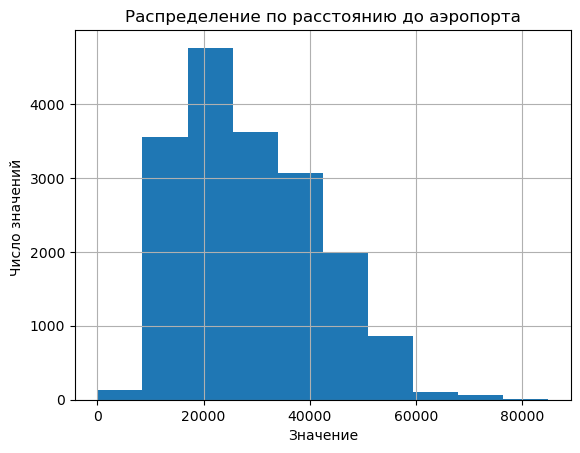

In [39]:
#Построение гистограммы по столбцу 
data['airports_nearest'].hist()
plt.title('Распределение по расстоянию до аэропорта')
plt.xlabel('Значение')
plt.ylabel('Число значений ')
plt.show()

Как видно, распределение похоже на нормальное: есть 1 пик, который находится примерно в середине. Выясним медианное значение. 

In [40]:
#определение медианного значения по столбцу
data['airports_nearest'].median()

26726.0

Есть смысл заполнить пропуски расстояниями, отсортированными по населённым пунктам.

In [41]:
#заполним пропуски по группам населённых пунктов
for locality_ind in data['locality_name'].unique():
    median=data.loc[data['locality_name']==locality_ind,'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna())&(data['locality_name']==locality_ind),'airports_nearest']=median
#для того, что не заполнилось, заполняем медианой по Ленобласти
data.loc[(data['airports_nearest']).isna(),'airports_nearest']=data['airports_nearest'].median()

In [42]:
#проверка числа пропусков
len(data[data['airports_nearest'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально (например, если расстояние до аэропорта велико, то показалось, что смысла заполнять данную графу нет), некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат в расстояния до аэропорта), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'cityCenters_nearest' (расстояние до центра города, м)
Пропуски в данном столбце необходимо заполнить значением: расстояние от квартиры до центра города должно существовать.

In [43]:
#определение числа пропусков
len(data[data['cityCenters_nearest'].isna()])

5519

Определим значение, которым можно заполнить пропуски. Вызовем гистограмму распределения расстояний. 

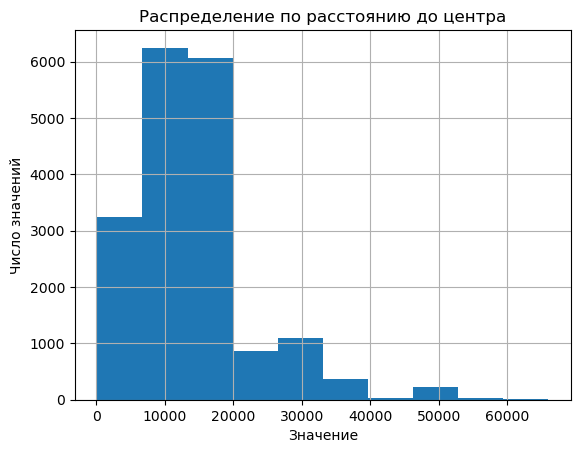

In [44]:
#Построение гистограммы по столбцу 
data['cityCenters_nearest'].hist()
plt.title('Распределение по расстоянию до центра')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Как видно, распределение не очень похоже на нормальное,но пик в принципе проглядывается. Выясним медианное значение. 

In [45]:
#определение медианного значения по столбцу
data['cityCenters_nearest'].median()

13098.5

Медианное значение подтверждает гистгорамму: оно лежит примерно в районе пика значений. Есть смысл заполнить пропуски именно им. Однако это уже серьёзное допущение по сравнению с аэропортом: аэропорт в Санкт-Петербурге и в области в принципе один, значит расстояния были до него ото всех квартир. А центров городов (Санкт-Петербург и городов в агломерации) несколько, более того: часть домов находится в Ленобласти, а ближе к центру Санкт-Петербурга, чем к центру своего районного центра. Следует помнить об этом в дальнейшем, если результаты исследования будут показывать какие-то нелогичные выводы относительно расстояния квартиры до центра города.

In [46]:
#заполнение пропусков медианными значениями столбца
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

In [47]:
#проверка числа пропусков
len(data[data['cityCenters_nearest'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально (например, если расстояние до центра велико, то показалось, что смысла заполнять данную графу нет или расстояние до центра "не своего" города ближе, чем расстояние до райцентра: человек и запутался, не стал заполнять), некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат в расстояния до центров городов), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'parks_around3000' (число парков в радиусе 3 км, шт)
Пропуски в данном столбце имеют право на существование: парков может и не быть.
Есть смысл заполнить пропуски нулевым значением.

In [48]:
#определение числа пропусков
len(data[data['parks_around3000'].isna()])

5518

In [49]:
#Заполнение пропусков методом fillna() нулевым значением столбца
data['parks_around3000']=data['parks_around3000'].fillna(0)

In [50]:
#проверка числа пропусков
len(data[data['parks_around3000'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'parks_nearest' (расстояние до ближайшего парка, м)
Пропуски в данном столбце по-хорошему не должны существовать: для каждой квартиры есть какой-либо ближайший парк и сооветствующее расстояние.
Однако заполнить пропуски каким-либо медианным значением скорее всего некорректно. Но, зная сколько парков находится в районе 3 км, можно заполнить пропуски для групп: если 0 парков, то медианное значение по группе с 0 парков вокруг, если 1 - то медиана от группы всех тех квартир, у которых 1 парк в районе 3 км, у кого 2 - соответствующая медиана, у кого 3 - аналогично.


C учётом окончательных диаграмм в исследованиях для данного параметра я решил не заполнять пропуски: это особенно выделяется для медианного значения для тех квартир, расстояние от которых до парка больше 3 км.


In [51]:
#определение числа пропусков
len(data[data['parks_nearest'].isna()])

15620

In [52]:
#Заполнение методом transform
#data['parks_nearest']=data.groupby('parks_around3000')['parks_nearest'].transform(lambda col: col.fillna(col.median()))

In [53]:
#проверка числа пропусков
len(data[data['parks_nearest'].isna()])

15620

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'ponds_around3000' (число водоёмов в радиусе 3 км, шт)
Пропуски в данном столбце имеют право на существование: водоёмов может и не быть.
Есть смысл заполнить пропуски нулевым значением.

In [54]:
#определение числа пропусков
len(data[data['ponds_around3000'].isna()])

5518

In [55]:
#Заполнение пропусков методом fillna() нулевым значением столбца
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

In [56]:
#проверка числа пропусков
len(data[data['ponds_around3000'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'ponds_nearest' (расстояние до ближайшего водоёма, м)
Пропуски в данном столбце по-хорошему не должны существовать: для каждой квартиры есть какой-либо ближайший водоём и сооветствующее расстояние.
Можно поступить аналогично паркам: зная сколько водоёмов находится в районе 3 км, можно заполнить пропуски для групп: если 0 водоёмов, то медианное значение по группе с 0 водоёмов вокруг, если 1 - то медиана от группы всех тех квартир, у которых 1 водоём в районе 3 км и т.д.

In [57]:
#определение числа пропусков
len(data[data['ponds_nearest'].isna()])

14589

In [58]:
#Заполнение методом tranform
data['ponds_nearest']=data.groupby('ponds_around3000')['ponds_nearest'].transform(lambda col: col.fillna(col.median()))

In [59]:
#проверка числа пропусков
len(data[data['ponds_nearest'].isna()])

14589

В данном случае заполнение по группам не произошло. Проверим какие уникальные значения принимает столбец 'ponds_nearest' для случая, когда 'ponds_around3000'==0:

In [60]:
data.query('ponds_around3000==0')['ponds_nearest'].unique()

array([nan])

Получается, что в этом случае при сгруппировании мы находим медиану от Nan. Тогда остается более грубо заполнить пропуски медианой по всему столбцу:

In [61]:
#заполнение пропусков медианными значениями столбца
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [62]:
#проверка числа пропусков
len(data[data['ponds_nearest'].isna()])

0

**Возможная причина пропусков данного столбца: незаполненные данные человеком изначально, некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц (например если это была конвертация адресов или координат), какая-нибудь более глубокая техническая ошибка**

##### Заполнение пропусков в столбце 'days_exposition' (кол-во дней размещения объявления, шт)
В некоторых случаях логично не заполнять пропуски данного столбца в силу того, что объявление может быть ещё размещено (длительность размещения для него непонятна), а заполнять пропуски заглушкой может потом принести проблемы с расчётами.

In [63]:
#определение числа пропусков
len(data[data['days_exposition'].isna()])

3181

**Возможная причина пропусков данного столбца: некорректное формирование данной таблицы если она была сформирована из нескольких других таблиц, какая-нибудь более глубокая техническая ошибка (например, некорректная работа фиксатора времени и даты публикации и снятия объявления**

#### Изменение типов данных

Проверим типы данных в таблице после заполнения пропусков:

In [64]:
#Вызов общей информации о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Заметно, что изменился тип данных для столбца is_apartment: до заполнения пропусков был object, теперь - bool, как и положено;
Остался один подозрительный тип данных: столбец first_day_exposition (object), но там хранится дата и время. Есть смысл преобразовать в datetime.

##### Изменение тип данных столбца first_day_exposition
Тип данных изначально - object, необходимо преобразовать его в datetime

In [65]:
##### Изменение тип данных столбца first_day_exposition
data['first_day_exposition']=pd.to_datetime(
    data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S'
)

In [66]:
#Проверка изменения типа данных
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Причина изменения типа данных: для оперирования именно значениями времени в дальнейшем нужно иметь формат datetime для данного столбца** 

#### Изучение уникальных значений в столбце с названиями населённых пунктов и удаление неявных дубликатов
Для избежания ошибок в анализе данных проверим уникальные значения названий и удалим неявные дубликаты.

In [67]:
#Вывод уникальных значений столбца при помощи метода unique()

data.sort_values(by='locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [68]:
#Создаём словарь замен для одинаковых по смыслу, но разных по написанию слов.
replace_dict={
    'городской поселок':'поселок',
    'городской посёлок':'поселок',
    'коттеджный поселок':'поселок',
    'коттеджный посёлок':'поселок',
    'поселок городского типа':'поселок',
    'посёлок городского типа':'поселок',
    'посёлок':'поселок'
}
punctuation_set=',.;:()[]\'!\"?'

In [69]:
#создание функции, которая получает текстовую строку и исключает из неё знаки пунктуации
def replace_punctuation(text):
    clean_text=''
    
    for letter in text:
        if letter not in punctuation_set:
            clean_text+=letter
    return clean_text

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Отличный код
</div>

In [70]:
#Функция замены строк на строки из словаря replace_dict
def apply_replace_dict(text):
    for key, value in replace_dict.items():
        text=text.replace(key,value)
    return text

In [71]:
#Объединение функций apply_replace_dict, replace_punctuation, добавление сброса регистра методм lower()
def locality_processing(locality_name):
    locality_name=replace_punctuation(locality_name)
    locality_name=locality_name.lower()
    locality_name=apply_replace_dict(locality_name)
    return locality_name

In [72]:
#Применение функции очистки неявных дубликатов locality_processing
data['locality_name']=data['locality_name'].apply(locality_processing)
#Проверка уникальных значений обновленного столбца
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня фёдоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

#### Нахождение и устранение редких и выбивающихся значений

Посмотрим на данные в таблице методом describe() с учётом заполненных пропусков.

In [73]:
#Вызов описания данных методом describe()
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,8079.000000,23699.000000,23699.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.638719,34.441157,5.892358,10.336885,0.591080,28382.996118,13936.792797,0.469049,490.804555,0.590911,508.143128,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.610834,21.802121,4.885249,5.718421,0.959298,11173.819659,7553.779633,0.748534,342.317995,0.883999,172.357382,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.200000,0.000000,21176.000000,10927.000000,0.000000,288.000000,0.000000,502.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,0.000000,26757.500000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.700000,8.000000,11.440000,1.000000,34496.500000,15248.500000,1.000000,612.000000,1.000000,502.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Подозрение вызывают данные в столбцах:

'ceiling_height' - высоты потолка 100 метров, а также 1 метр

'floors_total' - 60 этажей: в Санкт-Петербурге нету жилых небоскрёбов (погуглив, выясняется, что максимум - 37)

'airports_nearest' - 0: данное расстояние в метрах до аэропорта, что вряд ли представляется возможным: если условно на территории аэропорта и есть отели и другие гражданские здания, то квартир там быть не должно
 
'parks_nearest' - 1: хоть значение и подозрительное, но вообще в Санкт-Петербурге точно есть жилые дома на территориях парков, так что есть смысл оставить данные строки

'last_price' - 12190 рублей: скорее всего, что-то с этим значением не так

##### Устранение редких и выбивающихся значений в стоблце 'ceiling_height'

Построим димаграмму размаха для столбца 'ceilng_height'

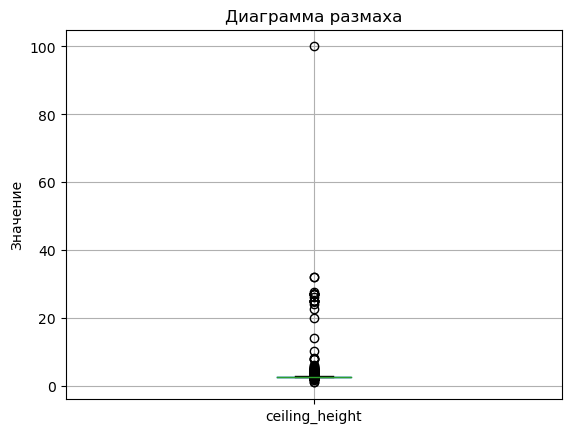

In [74]:
#построение диаграммы размаха методом boxplot
data.boxplot('ceiling_height')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

Из диаграммы видно, что есть одно аномально выделяющееся значение - 100 м. Отбросим его.
Также есть значеня в диапазоне до 40 м, предположим, что это опечатка, и высота потолков во всех случаях выбросов больше 26,5 определяются как 'ceiling_height'/10 (2,65 метра - медианное значение высоты потолка по столбцу)

In [75]:
#Удаление строки с высотой потолка 100
data=data[data['ceiling_height']<100]

In [76]:
#перевод высот больше 24 метров на порядок меньше:
data.loc[data['ceiling_height']>=26.5,'ceiling_height']=data.loc[data['ceiling_height']>=26.5,'ceiling_height']/10

Далее уже искусственно ограничим значения в диапазоне от 2.2 до 5 метров, исходя из здравого смысла для квартир.

In [77]:
data=data[(data['ceiling_height']>=2.2)&(data['ceiling_height']<=5)]

##### Устранение редких и выбивающихся значений в стоблце 'floors_total'

Построим димаграмму размаха для столбца

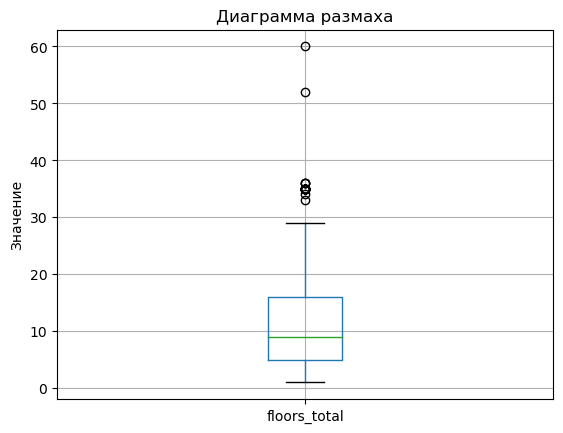

In [78]:
#построение диаграммы размаха методом boxplot
data.boxplot('floors_total')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

Из диаграммы видно, что есть два аномально выделяющихся значения -  около 52 и 60, а остальные, больше 3 квантиля распределения, лежат как раз в районе 30-40. Отбросим явно выделяющиеся и проверим максимальное значение в оставшихся значениях.

In [79]:
#исключение значений больше 50
data=data[data['floors_total']<50]

In [80]:
#проверка максимального значения из оставшихся
data['floors_total'].max()

36.0

##### Устранение редких и выбивающихся значений в стоблце 'airports_nearest'

Построим димаграмму размаха для столбца

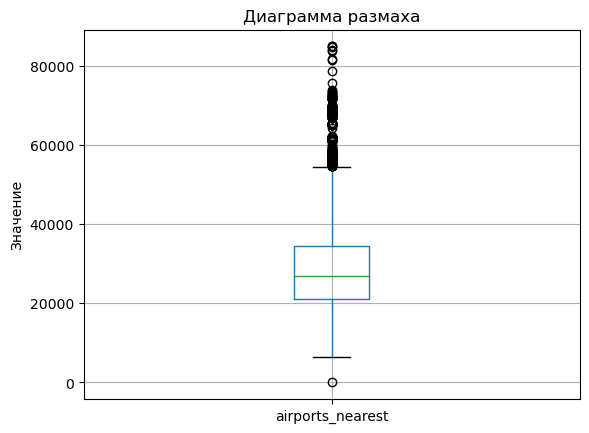

In [81]:
#построение диаграммы размаха методом boxplot
data.boxplot('airports_nearest')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

Заметно одно аномальное значение - кажется как раз 0. Удалим строку с минимальным значением:

In [82]:
#исключение минимального значения
data=data[(data['airports_nearest'])!=(data['airports_nearest'].min())]

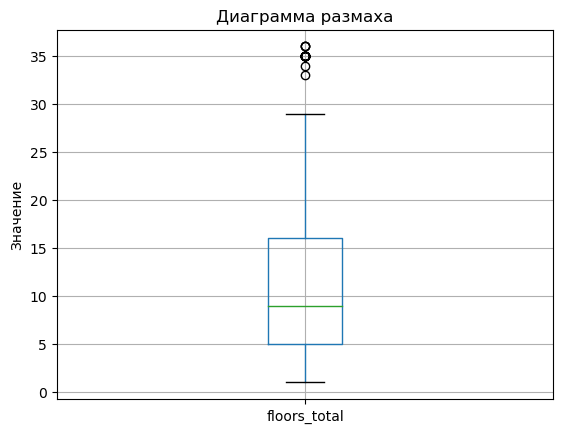

In [83]:
#построение диаграммы размаха методом boxplot
data.boxplot('floors_total')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

##### Устранение редких и выбивающихся значений в стоблце 'last_price'

Построим димаграмму размаха для столбца

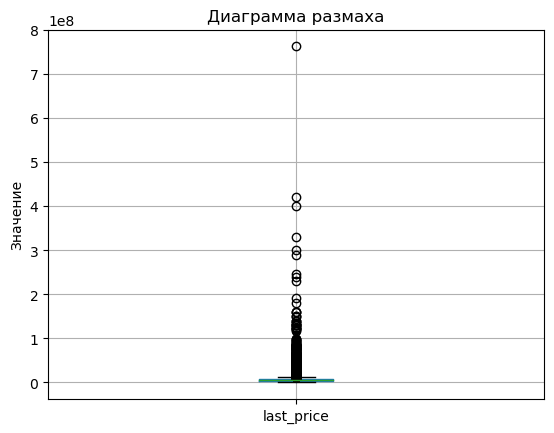

In [84]:
#построение диаграммы размаха методом boxplot
data.boxplot('last_price')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

Заметен сильный разброс цен в большую сторону, однако минимального значения не видно. Построим гистограмму в диапазоне от 0 до 500 тысяч рублей:

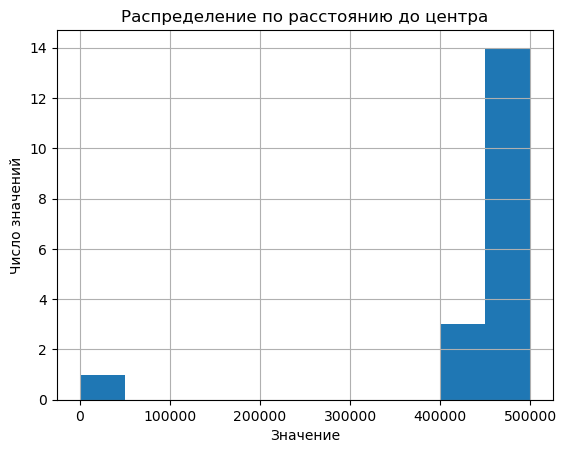

In [85]:
data['last_price'].hist(range=(0,500000))
plt.title('Распределение по расстоянию до центра')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Заметно только 1 значение в диапазоне до 100 тысяч рублей. Остальные цены уже начинаются в более реальном промежутке: от 400 тыссяч рублей. Убереём минимальное значение

In [86]:
#исключение минимального значения
data=data[(data['last_price'])!=(data['last_price'].min())]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23656 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23656 non-null  int64         
 1   last_price            23656 non-null  float64       
 2   total_area            23656 non-null  float64       
 3   first_day_exposition  23656 non-null  datetime64[ns]
 4   rooms                 23656 non-null  int64         
 5   ceiling_height        23656 non-null  float64       
 6   floors_total          23656 non-null  float64       
 7   living_area           23656 non-null  float64       
 8   floor                 23656 non-null  int64         
 9   is_apartment          23656 non-null  bool          
 10  studio                23656 non-null  bool          
 11  open_plan             23656 non-null  bool          
 12  kitchen_area          23656 non-null  float64       
 13  balcony         

##### Изменение тип данных столбца floors_total
Тип данных изначально - float, необходимо преобразовать его в int

In [88]:
##### Изменение тип данных столбца floors_total
data['floors_total']=data['floors_total'].astype(int)

In [89]:
#Проверка изменения типа данных
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int32

**Причина изменения типа данных:  если число исходя из логики целое, то лучше хранить его в соответствующем типе данных (а не как десятичное) как минимум для экономии места, занимаемого данными, а ещё для удобства чтения этих данных человеком** 

##### Изменение тип данных столбца balcony
Тип данных изначально - float, необходимо преобразовать его в int

In [90]:
##### Изменение тип данных столбца balcony
data['balcony']=data['balcony'].astype(int)

In [91]:
#Проверка изменения типа данных
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

**Причина изменения типа данных:  если число исходя из логики целое, то лучше хранить его в соответствующем типе данных (а не как десятичное) как минимум для экономии места, занимаемого данными, а ещё для удобства чтения этих данных человеком** 

##### Изменение тип данных столбца parks_around3000
Тип данных изначально - float, необходимо преобразовать его в int

In [92]:
##### Изменение тип данных столбца parks_around3000
data['parks_around3000']=data['parks_around3000'].astype(int)

In [93]:
#Проверка изменения типа данных
data['parks_around3000'].head()

0    1
1    0
2    1
3    2
4    2
Name: parks_around3000, dtype: int32

**Причина изменения типа данных:  если число исходя из логики целое, то лучше хранить его в соответствующем типе данных (а не как десятичное) как минимум для экономии места, занимаемого данными, а ещё для удобства чтения этих данных человеком** 

##### Изменение тип данных столбца ponds_around3000
Тип данных изначально - float, необходимо преобразовать его в int

In [94]:
##### Изменение тип данных столбца ponds_around3000
data['ponds_around3000']=data['ponds_around3000'].astype(int)

In [95]:
#Проверка изменения типа данных
data['ponds_around3000'].head()

0    2
1    0
2    2
3    3
4    1
Name: ponds_around3000, dtype: int32

**Причина изменения типа данных:  если число исходя из логики целое, то лучше хранить его в соответствующем типе данных (а не как десятичное) как минимум для экономии места, занимаемого данными, а ещё для удобства чтения этих данных человеком** 

In [96]:
#проверка на наличие явных дубликатов
data.duplicated().sum()

0

### Добавление в таблицу новых столбцов

**Добавление столбца 'price_per_m2': цена одного квадратного метра**

In [97]:
#добавление столбца с ценой 1 кв.м., посчитанного как отношение последней цены к полной площади
data['price_per_m2']=data['last_price']/data['total_area']

**Добавление столбца 'weekday_first_day_exp': день недели публикации объявления**

In [98]:
#добавление столбца с днём недели методом weekday (0-пн, 6-вс)
data['weekday_first_day_exp']=data['first_day_exposition'].dt.weekday

**Добавление столбца 'month_first_day_exp': месяц публикации объявления**

In [99]:
#добавление столбца с месяцем публикации методом weekday 
data['month_first_day_exp']=data['first_day_exposition'].dt.month

**Добавление столбца 'year_first_day_exp': год публикации объявления**

In [100]:
#добавление столбца с годом публикации методом weekday 
data['year_first_day_exp']=data['first_day_exposition'].dt.year

**Добавление столбца 'floor_type': тип этажа квартиры (первый, последний, другой)**

In [101]:
#добавление столбца с типом этажа методом loc
#добавление типа этажа - "первый"
data.loc[data['floor']==1,'floor_type']='первый'
#добавление типа этажа - "последний"
data.loc[data['floor']==data['floors_total'],'floor_type']='последний'
#добавление типа этажа - "другой"
data.loc[data['floor_type'].isna(),'floor_type']='другой'

In [102]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

**Добавление столбца 'cityCenter_km': расстояние до центра города в км**

In [103]:
#Добавление столбца с расстоянием до центра города в км
data['cityCenter_km']=(round(data['cityCenters_nearest']/1000))

### Проведите исследовательский анализ данных

#### Изучение параметра общая площадь.

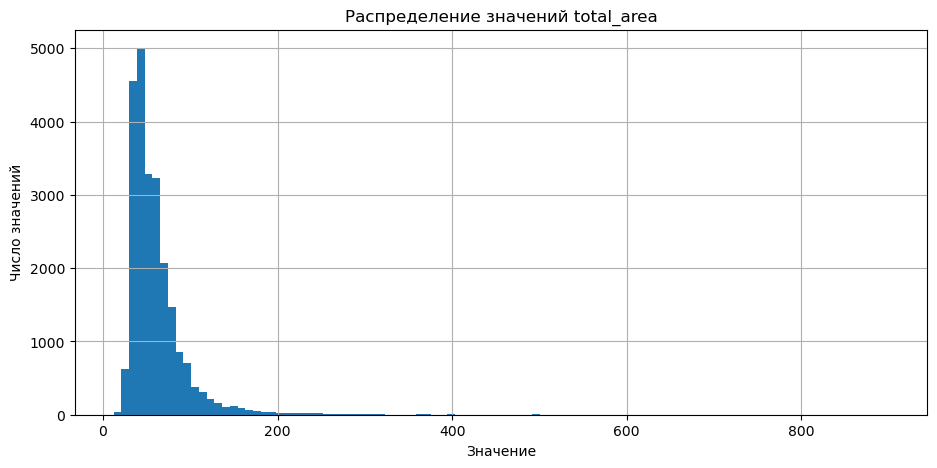

In [104]:
#построение гистограммы методом hist()
data['total_area'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений total_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что общая площадь лежит в пределах от 0 до 1000 м2, есть определенный пик в районе <100 м2. Посмотрим этот отрезок поближе:

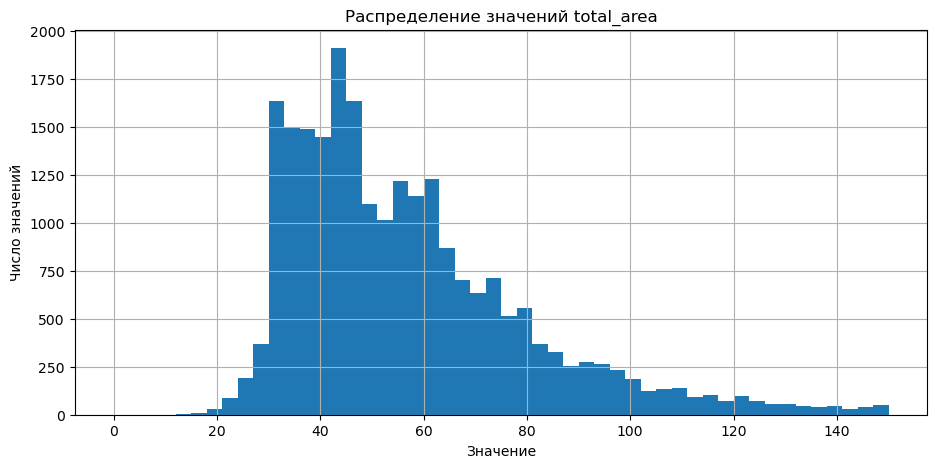

In [105]:
#построение гистограммы методом hist() с введенным параметром границ
data['total_area'].hist(bins=50,figsize=(11,5),range=(0,150))
plt.title('Распределение значений total_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что основная масса квартир имеет общую площадь от 30 до 80 м2, а наибольшее количество (больше 4 тыс. шт) имеют площади от 40 до 45 м2

#### Изучение параметра жилая площадь.

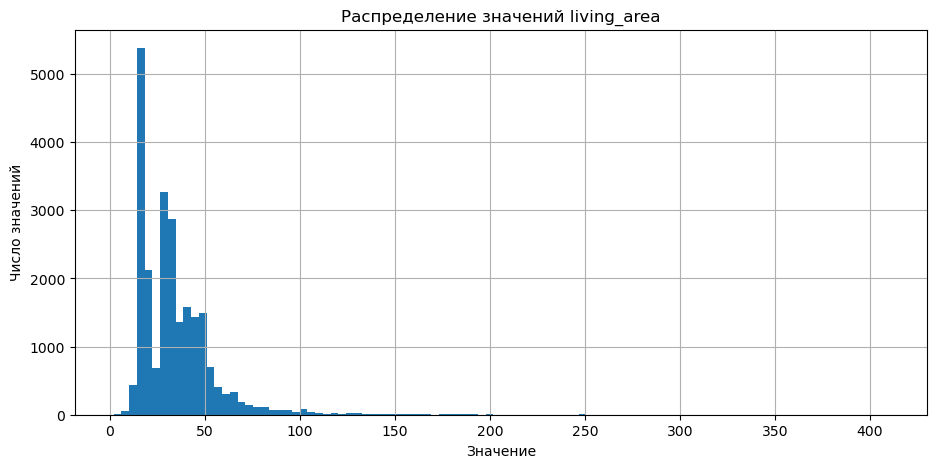

In [106]:
#построение гистограммы методом hist()
data['living_area'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений living_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что общая площадь лежит в пределах от 0 до 400 м2, основная масса сосредоточна в пределах от 0 до 100 м2. Посмотрим этот отрезок поближе:

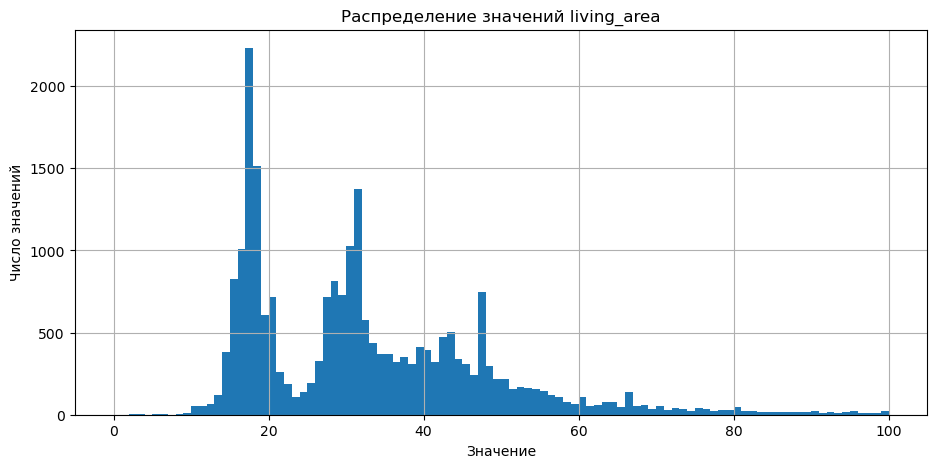

In [107]:
#построение гистограммы методом hist() с введенным параметром границ
data['living_area'].hist(bins=100,figsize=(11,5),range=(0,100))
plt.title('Распределение значений living_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что в данной подобрке основная масса квартир имеет несколько пиков в количестве: в районе 18 м2, 32 м2, 45м2, наибольшее количество (больше 2 тыс. шт) имеют площади 18 м2. Пики могут быть объянены заполнением пропусков медианным значением для квартир согласно количеству комнат: видимо медиана для студий была как раз 18 м2, для однокомнатных квартир - 32 м2 и тд. 

Но в целом интересен следующий провал, который коррелируется и со здравым смыслом:  в район 22 м2: видимо это неходовой размер жилой площади, так как для студий он может быть уже слишком большим, а для однокомнатных квартир - слишком маленьким.

Интересно, что провал между 1 и 2 комнатными квартирами не так заметен: видимо из-за конфигураций комнат разбег в жилой площади квартиры уже нивелирует значения: могут быть и условно большие однушки и маленькие двушки, а жилая площадь в них одинакова.

#### Изучение параметра площадь кухни.

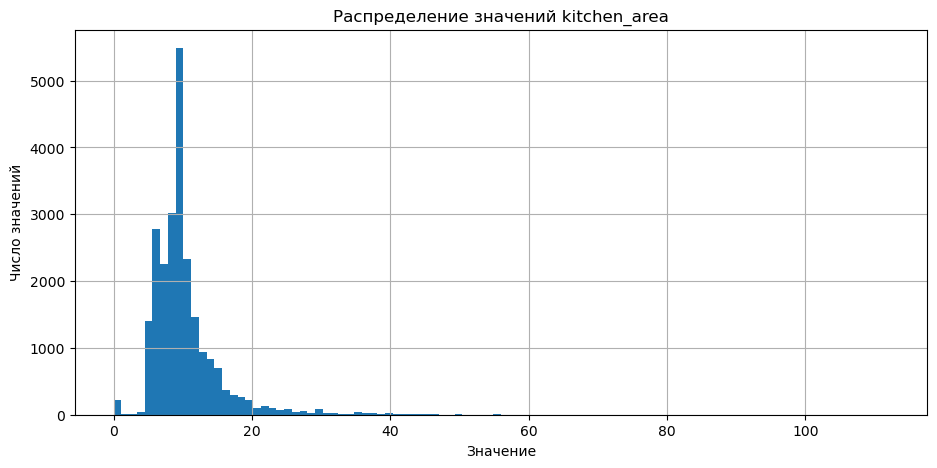

In [108]:
#построение гистограммы методом hist()
data['kitchen_area'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений kitchen_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что общая площадь лежит в пределах от 0 до 100 м2, основная масса в районе 0...30 м2, а есть определенный пик в районе 10 м2. Посмотрим этот отрезок поближе:

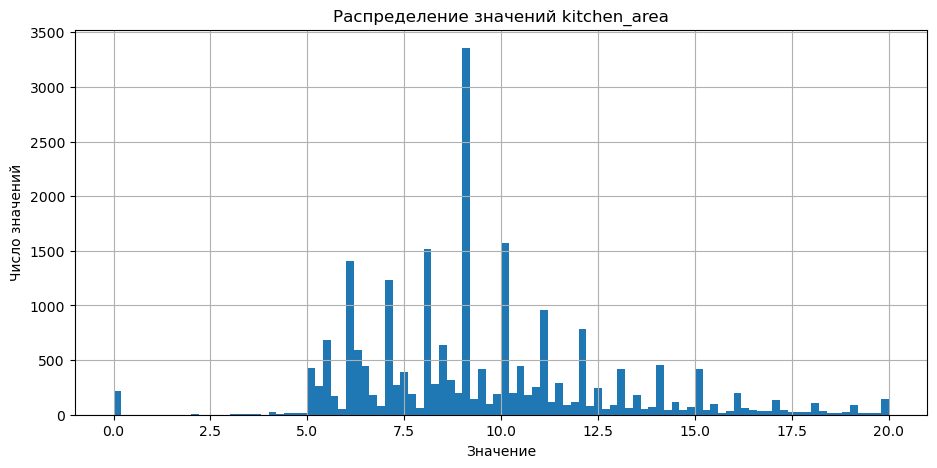

In [109]:
#построение гистограммы методом hist() с введенным параметром границ
data['kitchen_area'].hist(bins=100,figsize=(11,5),range=(0,20))
plt.title('Распределение значений kitchen_area')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Гистограмма отмечает несколько заметных пиков: в районе 0 - это квартиры без кухни.

Также есть пик в районе 9 м2: он также объясняется скорее заполнением пропусков медианным значением.

Интересно, что кухни имеют неравномерное распределение площадей: видимо есть более популярные стандартные размеры (они могут быть обусловлены примерной длиной кухонного гарнитура, которую прикидывает проектировщик: длина кухни будет зависеть от конфигурации и расти не линейно, а пропорционально добавлению одного шкафа ширины 60 или 80 см - минимальной единицы кухонного гарнитура), но в целом основная масса площадей кухонь лежит в пределах от 5 до 15 м2.

#### Изучение параметра цена объекта.

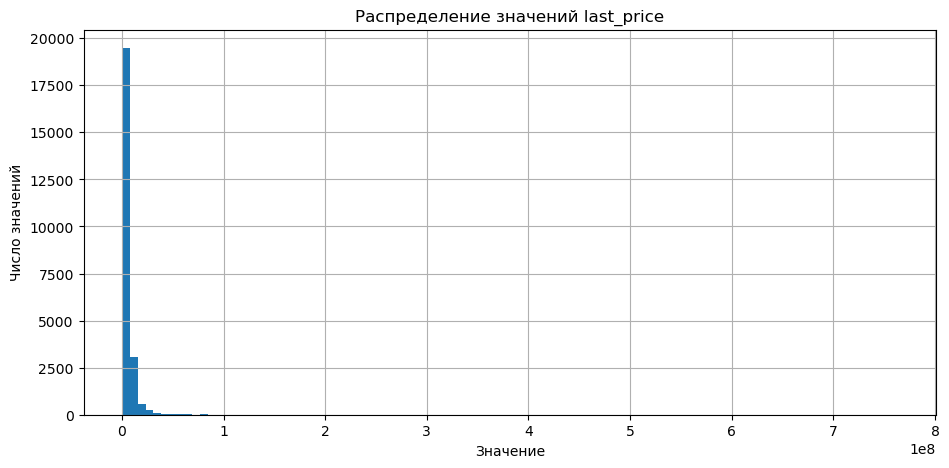

In [110]:
#построение гистограммы методом hist()
data['last_price'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений last_price')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что цены лежат в пределах от 0 до 800 млн рублей, а основная масса  <50 млн рублей, а пиковое значение - до 10. Посмотрим на распределение до 50 млн рублей:

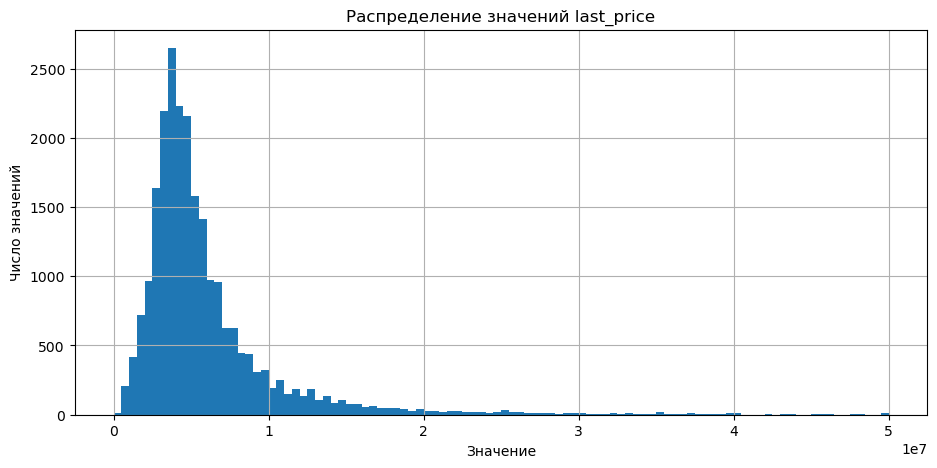

In [111]:
#построение гистограммы методом hist() с введенным параметром границ
data['last_price'].hist(bins=100,figsize=(11,5),range=(0,50000000))
plt.title('Распределение значений last_price')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что основная масса квартир имеет цену от 0 до 10 млн рублей, а наибольшее количество (больше 8 тыс. шт) имеют цену от 5 до 8 млн. Увеличим обзор от 0 до 10 млн:

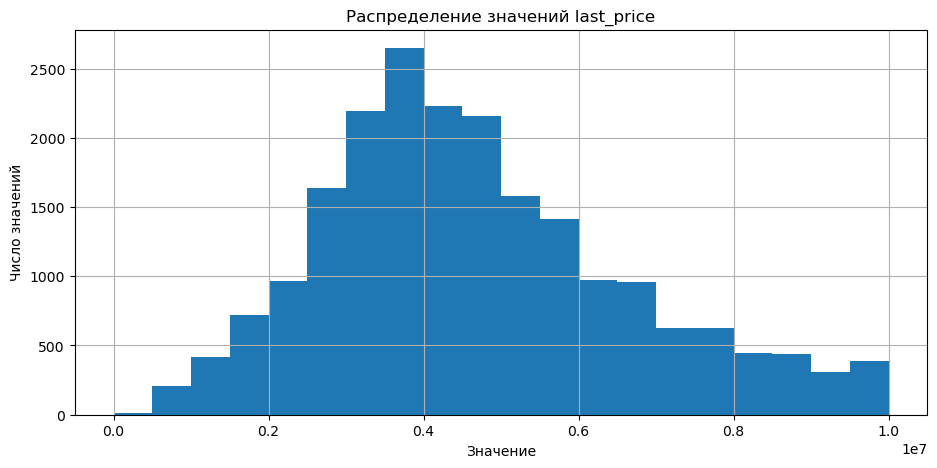

In [112]:
#построение гистограммы методом hist() с введенным параметром границ
data['last_price'].hist(bins=20,figsize=(11,5),range=(0,10000000))
plt.title('Распределение значений last_price')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что основная масса квартир имеет цену от 2 до 6 млн, а наибольшее количество (больше 8 тыс. шт) имеют цену от 3 до 5 млн. 

#### Изучение параметра количество комнат.

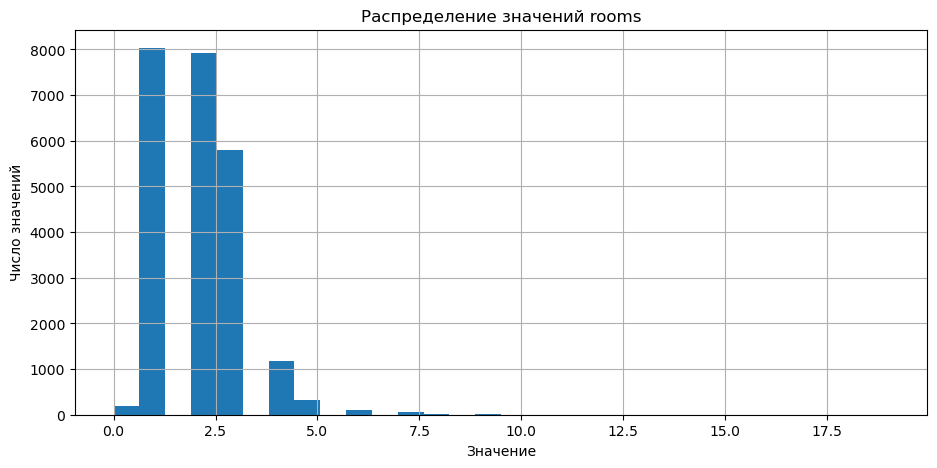

In [113]:
#построение гистограммы методом hist()
data['rooms'].hist(bins=30,figsize=(11,5))
plt.title('Распределение значений rooms')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что значения лежат в пределах от 0 до 19 шт, основная масса в районе 0...5, самые ходовые квартиры - 1, 2 и 3-х комнатные.

#### Изучение параметра высота потолков.

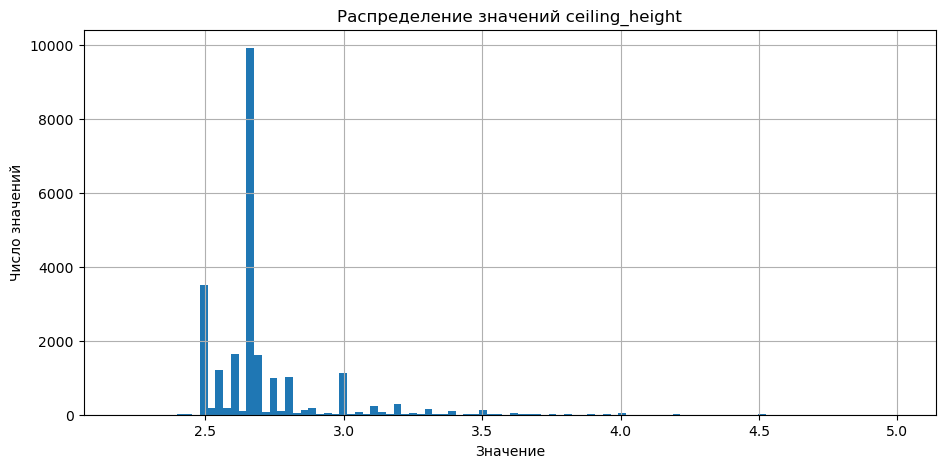

In [114]:
#построение гистограммы методом hist()
data['ceiling_height'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений ceiling_height')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что значения лежат в пределах от 0 до 5м, есть пик (видимо от заполнения пропусков медианой) в районе 2.6м, а в целом основная масса лежит в районе 2.5...3м.

#### Изучение параметра этаж квартиры.

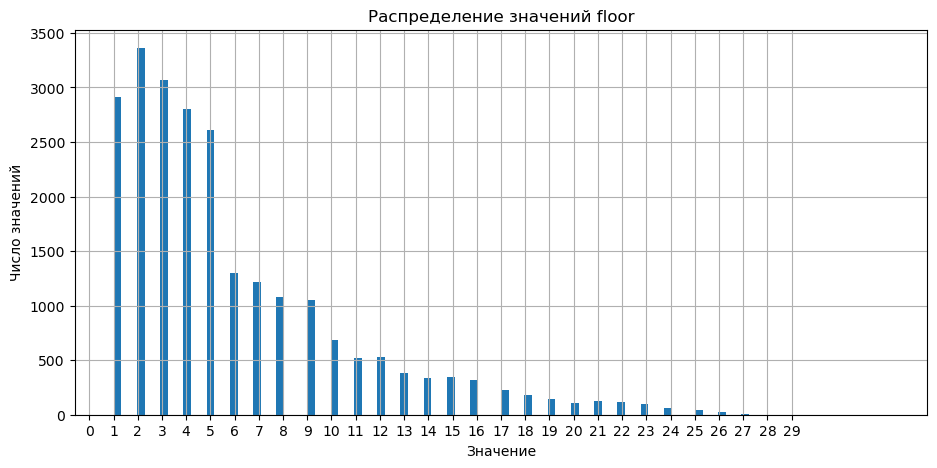

In [115]:
#построение гистограммы методом hist()
data['floor'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений floor')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.xticks(range(0,30))
plt.show()

Из гистограммы видно, что этажность квартир лежит в пределах от 0 до 35, основная масса в районе 0...5 этажей, но и далее значения имеют определенный вес: от 5 до 10 этажей и от 10 до 20.

#### Изучение параметра тип этажа квартиры.

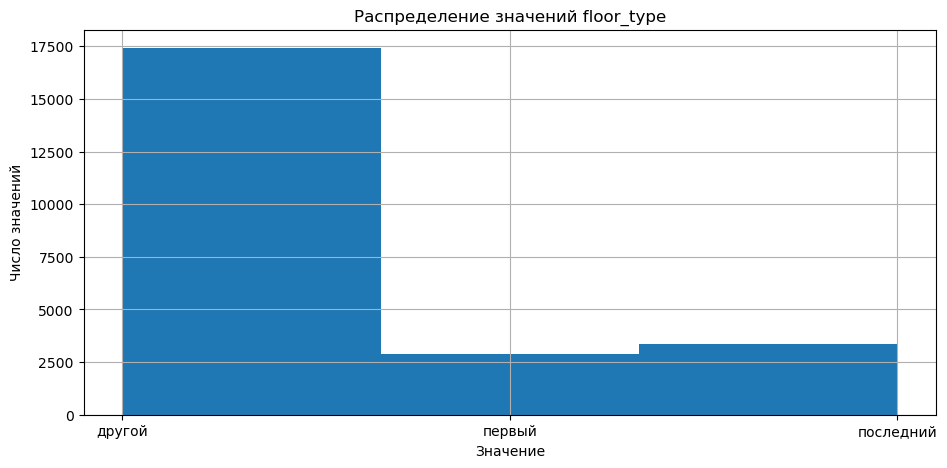

In [116]:
#построение гистограммы методом hist()
data['floor_type'].hist(bins=3,figsize=(11,5))
plt.title('Распределение значений floor_type')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что наибольшее количество квартир - не на первом и не на последнем этаже, логично. А также заметно, что квартир на первых и на последних этажах продаётся примерно одинаковое количество, но на последнем - больше, что возможно объяснить наличием в домах коммерческой недвижимости на первых этажах жилых домов, тогда как на последних - очень маловероятно.

#### Изучение параметра общее количество этажей в доме.

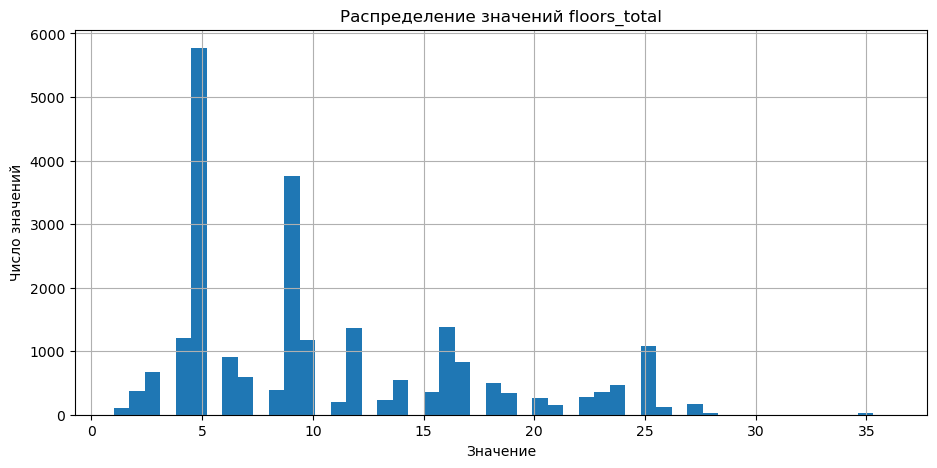

In [117]:
#построение гистограммы методом hist()
data['floors_total'].hist(bins=50,figsize=(11,5))
plt.title('Распределение значений floors_total')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что в целом дома имеют до 40 этажей. Наибольшее количество домов - 5-этажные, а также есть ещё пик количества девятиэтажек. Далее уже есть локальные пики в районе 12, 16, 25 этажей. Первые два (5 и 9) пика можно объяснить типовой советской застройкой. Остальные пики могут быть объяснены стандартным выбором современных застройщиков.

Эти количества этажей могут зависеть от максимально возможной высоты дома, при которой не нужно будет переводить дом на новую, более мощную инженерную инфраструктуру, например от величины давления в трубах и типоряда насосных станций, которые это давление создают: при высоте дома в 12 этажей нужен насос одной мощности, а для 13-ти этажей он уже не прокачает, нужен следующий типовой насос, который,  свою очередь, может прокачать воду уже до 16-го этажа и так далее.

#### Изучение параметра расстояние до центра города, м.

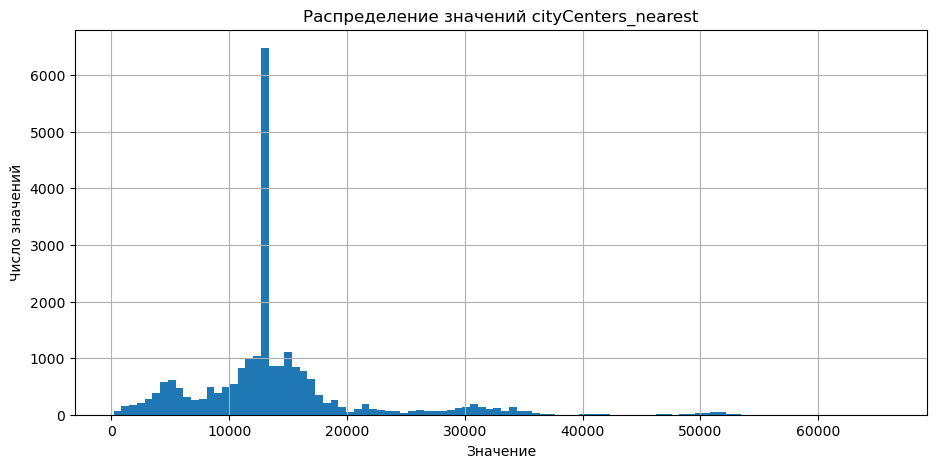

In [118]:
#построение гистограммы методом hist()
data['cityCenters_nearest'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений cityCenters_nearest')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что диапазон расстояний лежит от 0 до 80 км, и есть определенный пик (скорее всего он выделяется так сильно ввиду заполнения пропусков медианой), а основная масса квартир имеет два пика расстояний: в районе 5 км и в районе 13 км. Это можно объяснить тем, что в Санкт-Петербурге (наибольшее количество квартир оттуда) есть такая штука, как "пояс промзон", который отделяет центр города от массовой застройки (снижение в районе 7 км).

#### Изучение параметра расстояние до ближайшего аэропорта, м.

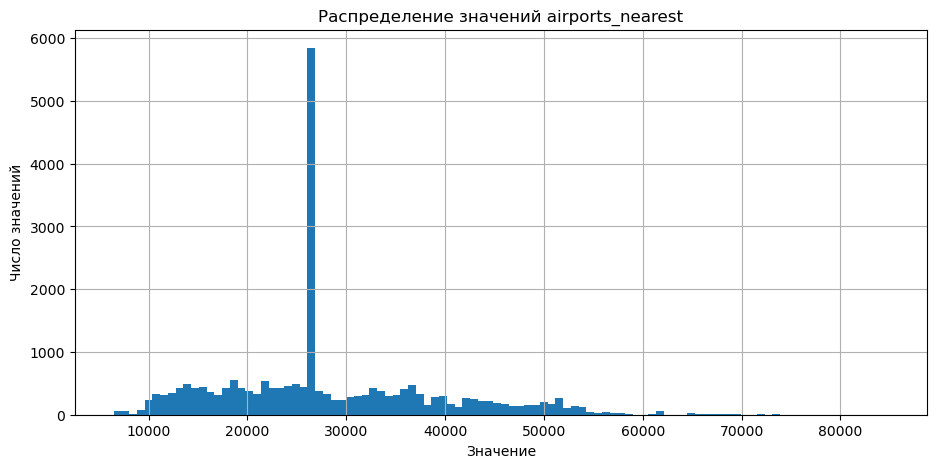

In [119]:
#построение гистограммы методом hist()
data['airports_nearest'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений airports_nearest')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что диапазон расстояний лежит от 0 до 80 км, и есть определенный пик в районе 26 км (скорее всего он выделяется так сильно ввиду заполнения пропусков медианой), а основная масса квартир расположена в широком диапазоне расстояний от аэропорта: от 10 до 55 км. 

#### Изучение параметра расстояние до ближайшего парка, м.

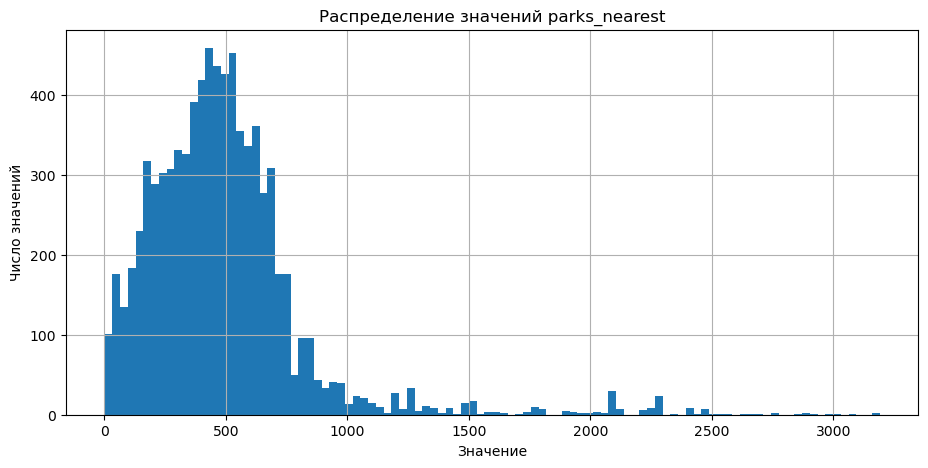

In [120]:
#построение гистограммы методом hist()
data['parks_nearest'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений parks_nearest')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

    
C учётом окончательных диаграмм в исследованиях для данного параметра я решил не заполнять пропуски: это особенно выделяется для медианного значения для тех квартир, расстояние от которых до парка больше 3 км.
Ниже представлен старый вывод:


Из гистограммы видно, что диапазон расстояний лежит от 0 до 4 км, и есть определенный пик (скорее всего он выделяется так сильно ввиду заполнения пропусков медианой для тех квартир, которые не имеют в переделах 3 км парков: имеют в среднем по больнице парк на расстоянии 3300:)), а основная масса квартир, рядом с которыми есть парки, имеют расстояния до них в пределах 0...1000 метров с плавным равномерным распределением.

#### Изучение параметра день и месяц публикации объявления.

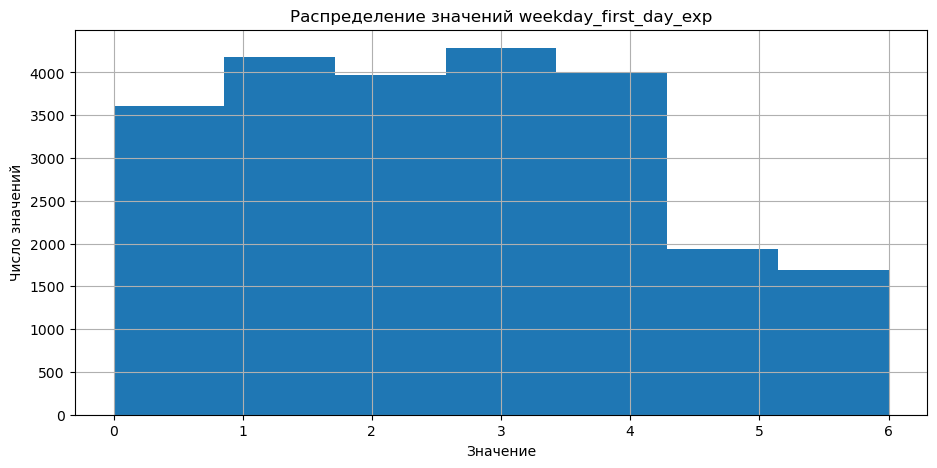

In [121]:
#построение гистограммы методом hist() для дня публикации
data['weekday_first_day_exp'].hist(bins=7,figsize=(11,5))
plt.title('Распределение значений weekday_first_day_exp')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что в течение недели большее количество объявлений выкладывается в будние дни (причём понедельник менее активный из них), а наименьшее количество - в воскресенье.

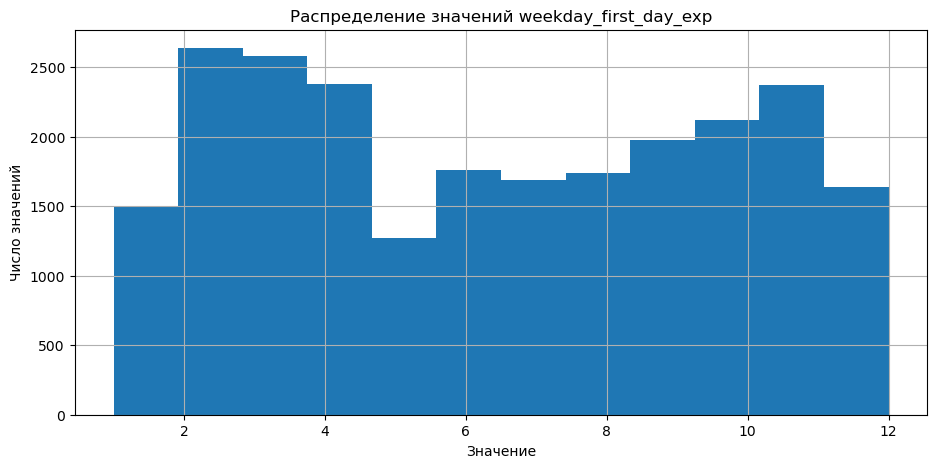

In [122]:
#построение гистограммы методом hist() для месяца публикации
data['month_first_day_exp'].hist(bins=12,figsize=(11,5))
plt.title('Распределение значений weekday_first_day_exp')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

Из гистограммы видно, что в течение года большее количество объявлений выкладывается в феврале,марте и апреле (причём понедельник менее активный из них), а наименьшее количество - в декабре, январе и в мае. Декабрь и январь можно объяснить концом когда (напряженные рабочие дни, поиск подарков и начало зимы) и большим количеством выходных дней в январе. Майский провал можно бы объяснить суеверностью населения:) (в серьёзных покупках людя возможно боятся "маяться" всю жизнь потом в этой квартире, ну а вообще майские праздники, начало сезона отпусков вносят свою лепту).

Но в целом можно утверждать, что начиная с мая по август - выкладывается на продажу меньшее количество квартир, тогда как с сентября по декабрь количество объялений растёт, а максимум - в феврале-апреле.

#### Изучение скорости продажи квартиры.

**Построение гистограммы.**

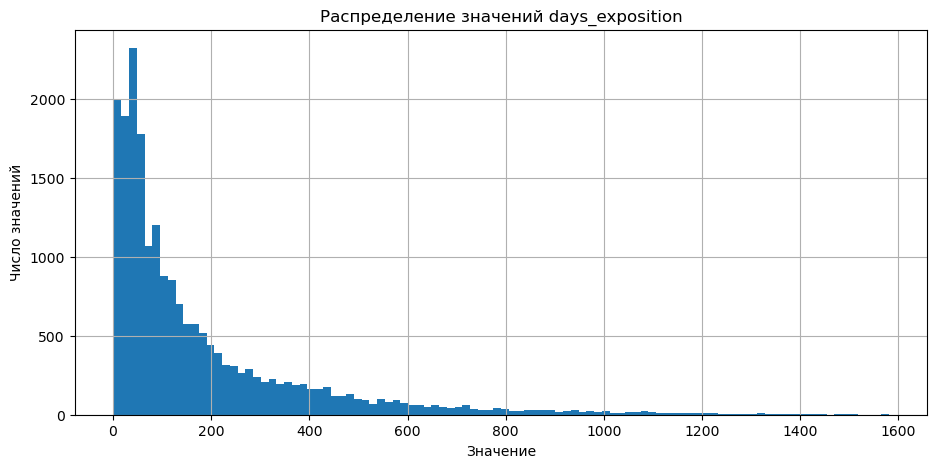

In [123]:
data['days_exposition'].hist(bins=100,figsize=(11,5))
plt.title('Распределение значений days_exposition')
plt.xlabel('Значение')
plt.ylabel('Число значений')
plt.show()

**Нахождение среднего и медианы**

In [124]:
#нахождение среднего
data['days_exposition'].mean()

180.92427867011668

In [125]:
#нахождение медианы
data['days_exposition'].median()

95.0

**Вывод**

На гистограмме видно, что время продажи занимает время от 0 до 1650 дней. Основная масса объявлений держится от 0 до 200 дней, причём можно увидеть несколько выделяющихся пиков: они появились скорее всего ввиду заполнения пропусков медианным значением по количеству комнат.

Но в целом картина следующая: есть значимое количество объявлений, которые закрываются в течение первых 70 дней, ближе к 200 дням можно увидеть ещё возрастание активности, а после 800 дней количество продаж уже сравнительно сильно мменьше. 

Можно поделить скорость продаж на 3 группы:

Быстрые: до 200 дней
Средние: от 200 до 500 дней
Медленные:больше 500 дней

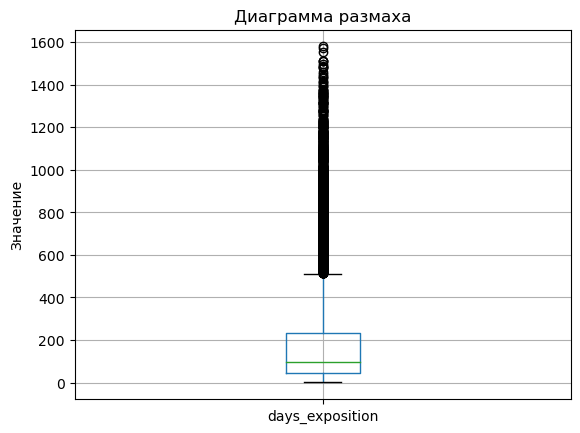

In [126]:
data.boxplot('days_exposition')
plt.title('Диаграмма размаха')
plt.ylabel('Значение')
plt.show;

In [127]:
data['days_exposition'].describe()

count    20483.000000
mean       180.924279
std        219.792991
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

   
Уточняю вывод: быстрыми можно считать все продажи, выполненные менее, чем за 95 дней, а медленными - более, чем за 95 дней.
    
Также возможно стоит иметь в виду, что в целом объявления, которые публикуются в течение 232(Q3) дней, не "затяжные": эти данные лежат в порядке нормальных.


#### Изучение влияния различных факторов на общую(полную) стоимость объекта.

##### Изучение влияния общей площади на стоимость объекта.

In [128]:
#Нахождение коэффициента корреляции
data['total_area'].corr(data['last_price'])

0.652092930821392

Данный коэффициент корреляции говорит о существовании небольшой прямой линейной зависимости: чем больше общая площадь, тем больше стоимось квартиры.

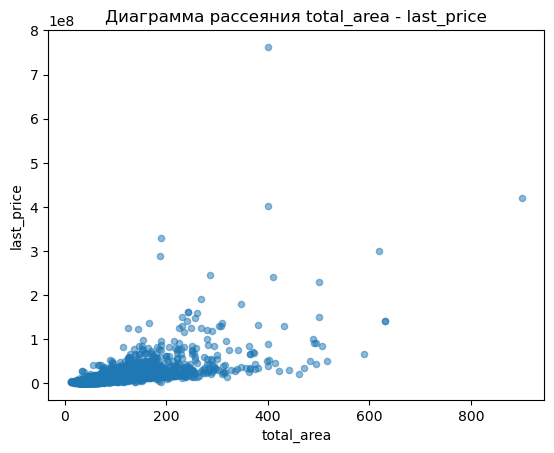

In [129]:
#построение диаграммы рассеяния
data.plot(x='total_area', y='last_price', kind='scatter',alpha=0.5)
plt.title('Диаграмма рассеяния total_area - last_price')
plt.show()

**Вывод**

На данной диаграмме видно, что да, действительно: чем больше площадь, тем выше цена, однако зависимость не жёстко прямолинейная: существует большой разброс в ценах для квартир одной площади, а также есть выбросы. 

Точнее можно было бы сказать следующее: минимальная цена квартиры сильно зависит от площади, а вот максимальная цена может зависеть и от множества других факторов.

В принципе, это логично: например, можно говорить о качестве ремонта: если сравнивать друг с другом квартиры с одинаковым ремонтом, то разница в их стоимости будет пропорциональна разнице площадей (при прочих равных), а вот если взять две квартиры с одинаковой площадью и разным ремонтом, то их стоимость будет пропорциональна скорее как раз разнице качества ремонта, а вот относительно площади зависимости не будет: площадь у них одинакова.

##### Изучение влияния жилой площади на стоимость объекта.

In [130]:
#Нахождение коэффициента корреляции
data['living_area'].corr(data['last_price'])

0.5534993043920561

Данный коэффициент корреляции говорит о существовании небольшой прямой линейной зависимости: чем больше жилая площадь, тем больше стоимось квартиры. Однако интересно наблюдать, что данный коэффициент немного меньше, чем для зависимости стоимости квартиры от общей площади.

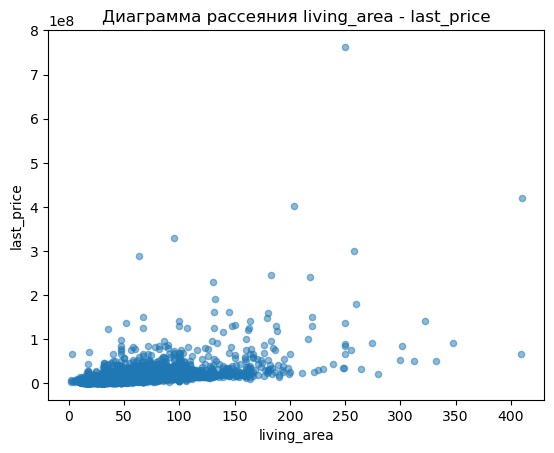

In [131]:
#построение диаграммы рассеяния
data.plot(x='living_area', y='last_price', kind='scatter',alpha=0.5 ) 
plt.title('Диаграмма рассеяния living_area - last_price')
plt.show()

**Вывод**

На данной диаграмме видно, что да, действительно: чем больше жилая площадь, тем выше цена, однако зависимость не жёстко прямолинейная: существует большой разброс в ценах для квартир одной площади, а также есть выбросы. В принципе диаграмма рассеяния похожа на зависимость полной площади от цены и выводы можно сделать примерно те же: прямая зависимость очеьн хорошо видная для минимальной стоимости квартир, а вот для квартир с одинаковой жилой площадью уже может существовать разброс, который зависит от множества других факторов.


##### Изучение влияния площади кухни на стоимость объекта.

In [132]:
#Нахождение коэффициента корреляции
data['kitchen_area'].corr(data['last_price'])

0.43557983215342116

Данный коэффициент корреляции говорит о существовании небольшой прямой линейной зависимости: чем больше общая площадь, тем больше стоимось квартиры, но данная зависимость ещё слабее, слабее чем зависимость от общей и жилой площадей.

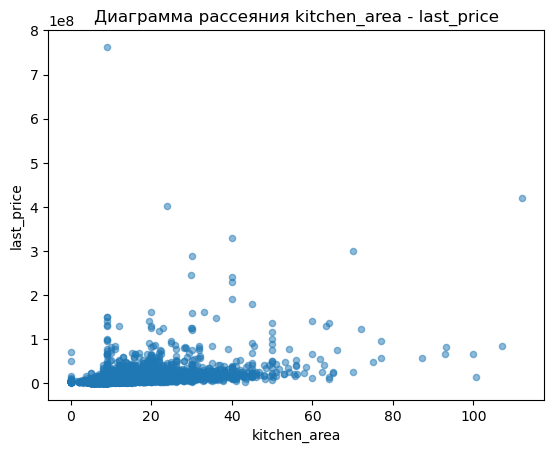

In [133]:
#построение диаграммы рассеяния
data.plot(x='kitchen_area', y='last_price', kind='scatter',alpha=0.5 )
plt.title('Диаграмма рассеяния kitchen_area - last_price')
plt.show()

На данной диаграмме видно, что да, действительно: чем больше площадь кухни, тем выше цена квартиры, однако зависимость не жёстко прямолинейная: существует большой разброс в ценах для квартир c кухнями одной площади, а также есть выбросы. В целом зависимость похожа на зависимости стоимости от жилой и общей площади.

##### Изучение влияния количества комнат на стоимость объекта.

In [134]:
#Нахождение коэффициента корреляции
data['rooms'].corr(data['last_price'])

0.3625387493059262

Данный коэффициент корреляции говорит о существовании небольшой прямой линейной зависимости: чем больше общая площадь, тем больше стоимось квартиры. Однако он ещё слабее, чем у предыдущих.

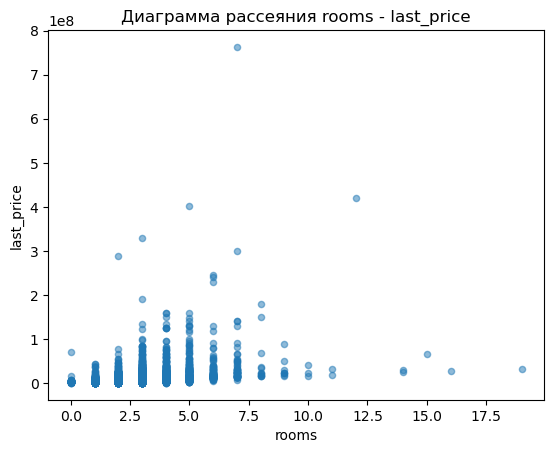

In [135]:
#построение диаграммы рассеяния
data.plot(x='rooms', y='last_price', kind='scatter',alpha=0.5 )
plt.title('Диаграмма рассеяния rooms - last_price')
plt.show()


На данной диаграмме видно, что да, действительно: чем больше площадь, тем выше цена, однако зависимость не жёстко прямолинейная: существует большой разброс в ценах для квартир одной площади, а также есть выбросы. 

Точнее можно было бы сказать следующее: минимальная цена квартиры зависит от комнатности, а вот максимальная цена может зависеть и от множества других факторов.

Интересно наблюдать, что вот например для студий, 1-комнатных, 2-комнатных и 3-комнатных квартир завимость видна сильно линейная: чем больше комнат, тем больше стоимость, а вот между 3,4,5,6-комнатными квартирами рзницы сильной нет: стоят примерно одинаково, а ещё интереснее, что от 6 до 11 комнат виден тренд на умеьшение стоимости квартиры.

##### Изучение влияния этажа расположения на стоимость объекта.

In [136]:
#Нахождение коэффициента корреляции
data['floor'].corr(data['last_price'])

0.02705723061750016

Данный коэффициент корреляции говорит о почти отсутствующей линейной зависимости стоимости квартиры от этажа расположения.

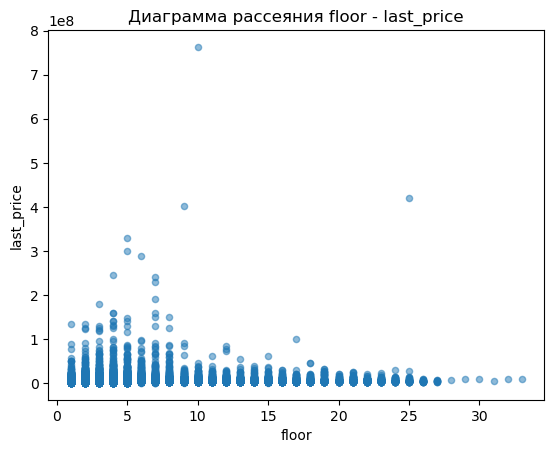

In [137]:
#построение диаграммы рассеяния
data.plot(x='floor', y='last_price', kind='scatter',alpha=0.5 ) 
plt.title('Диаграмма рассеяния floor - last_price')
plt.show()

**Вывод**

На данной диаграмме видно, что да, действительно: тренд стоимость/этаж примерно параллелен оси х, но также интересно отметить, что стоимости квартир, расположенных на этажах до 10, в целом выше, чем на этажах  больше 10: это можно объяснть например классом жилья. Можно предположить, что элитное жильё может продаваться в домах небольшой высоты (например, если застройка в центре Санкт-Петербурга, то при вписывании нового дома в окружающий квартал, его нельзя сделать сильно выше старого фонда, а так как цена земли высока, то есть смысл строить и дорогое жильё), в то же время как для новостроек большой этажности свойственна погоня застройщиков за выгодой и строительство высоких домов, при возможности продавать квартиры по более доступным ценам.

##### Изучение влияния тип этажа расположения на стоимость объекта.

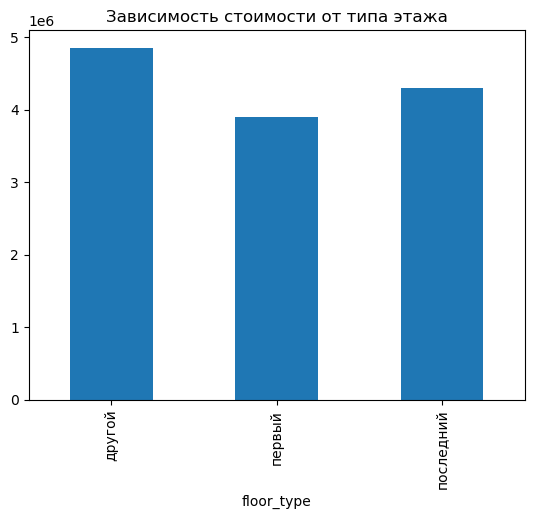

In [138]:
#построение столбчатой диаграммы

data.groupby('floor_type')['last_price'].median().plot.bar(title='Зависимость стоимости от типа этажа');

**Вывод**

На данной диаграмме видно, что значимой разницы
между указанными типами этажей нет, но всё же: первый - самый дешёвый, а любой кроме последнего, будет подороже, чем последний

##### Изучение влияния даты размещения на стоимость объекта.

**Изучение влияния дня недели на стоимость объекта**

In [139]:
#Нахождение коэффициента корреляции
data['weekday_first_day_exp'].corr(data['last_price'])

0.001743015156124914

Данный коэффициент корреляции говорит об отсутствии линейной зависимости: стоимость квартиры не меняется ото дня недели ко дню недели.

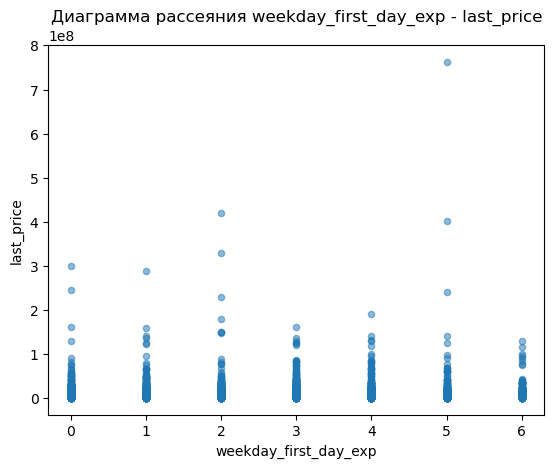

In [140]:
#построение диаграммы рассеяния

data.plot(x='weekday_first_day_exp', y='last_price', kind='scatter',alpha=0.5 ) 
plt.title('Диаграмма рассеяния weekday_first_day_exp - last_price')
plt.show()


На данной диаграмме видно, что да, действительно: между днями недели в целом разницы нет: можно выкладывать объявление в любой из дней, стоимости к ней это не прибавит и не убавит.

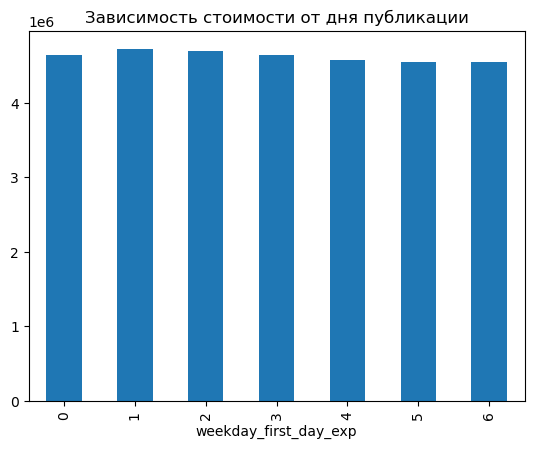

In [141]:
#построение столбчатой диаграммы
data.groupby('weekday_first_day_exp')['last_price'].median().plot.bar(title='Зависимость стоимости от дня публикации');

**Изучение влияния месяца на стоимость объекта**

In [142]:
#Нахождение коэффициента корреляции
data['month_first_day_exp'].corr(data['last_price'])

0.0023486023005048675

Данный коэффициент корреляции говорит об отсутствии линейной зависимости: стоимость квартиры не меняется в течение года.

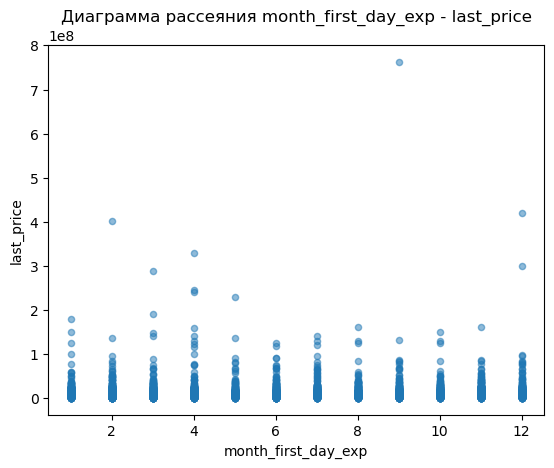

In [143]:
#построение диаграммы рассеяния
data.plot(x='month_first_day_exp', y='last_price', kind='scatter',alpha=0.5 ) 
plt.title('Диаграмма рассеяния month_first_day_exp - last_price')
plt.show()

На данной диаграмме видно, что да, действительно: между месяцами в целом разницы нет: можно выкладывать объявление в любой из месяцев, стоимости к ней это не прибавит и не убавит, что интересно: ведь рассмотренный ранее график зависимости количества продаж и месяца публикации показал, что существуют явно удачные и неудачные месяцы. 

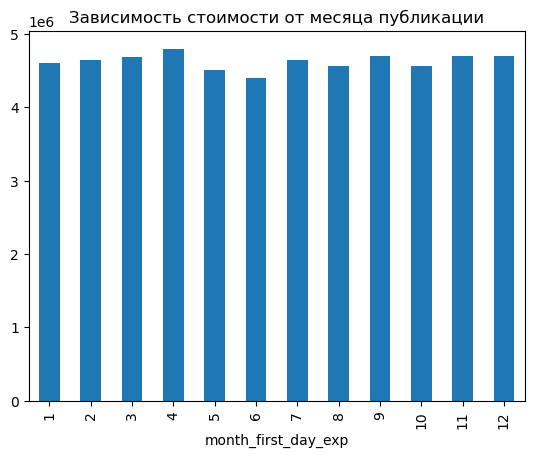

In [144]:
#построение столбчатой диаграммы
data.groupby('month_first_day_exp')['last_price'].median().plot.bar(title='Зависимость стоимости от месяца публикации');

**Изучение влияния года на стоимость объекта**

In [145]:
#Нахождение коэффициента корреляции
data['year_first_day_exp'].corr(data['last_price'])

-0.0425233556466041

Данный коэффициент корреляции говорит об отсутствии линейной зависимости: стоимость квартиры не меняется ото дня недели ко дню недели.

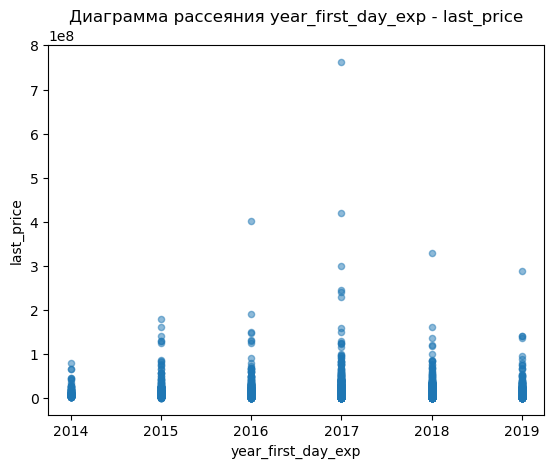

In [146]:
#построение диаграммы рассеяния
data.plot(x='year_first_day_exp', y='last_price', kind='scatter',alpha=0.5 ) 
plt.title('Диаграмма рассеяния year_first_day_exp - last_price')
plt.show()

**Вывод**

На данной диаграмме видно, что разнциа в стоимости жилья от года к году есть, но прямолинейнй её не назвать: например, в 2015 году жильё явно подорожало относительно предыдущего года, а вот далее цены как будто не сильно расли или уменьшались.

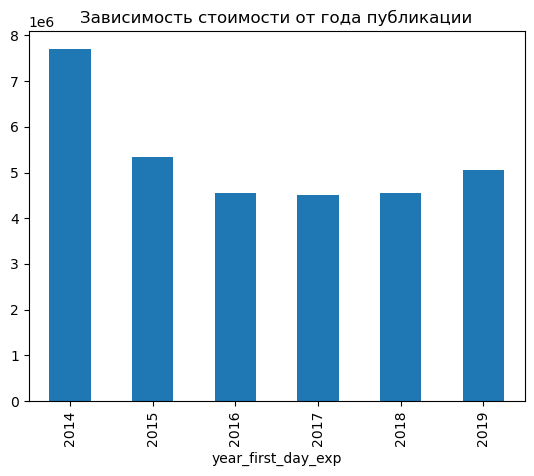

In [147]:
#построение столбчатой диаграммы
data.groupby('year_first_day_exp')['last_price'].median().plot.bar(title='Зависимость стоимости от года публикации');

##### Подсчёт средней цены одного кв. м. в 10 населённых пунктах с наибольшим числом объявлений.

In [148]:
#Подсчёт средней цены и количества объявлений (как количество "средних цен") при помощи метода pivot_table, 
#сортировка по количеству объявлений, и обращение к 10 первым значениям в столбце со значениями медианной цены за кв.м.
price_median=pd.pivot_table(data,values='price_per_m2',index='locality_name',aggfunc={'median','count'})\
    .sort_values(by='count',ascending=False)['median'][:10]

In [149]:
price_median

locality_name
санкт-петербург      104761.904762
поселок мурино        85878.462169
поселок шушары        76876.172608
всеволожск            65789.473684
пушкин               100000.000000
колпино               74723.748474
поселок парголово     91642.857143
гатчина               67860.569236
деревня кудрово       91860.465116
выборг                58307.692308
Name: median, dtype: float64

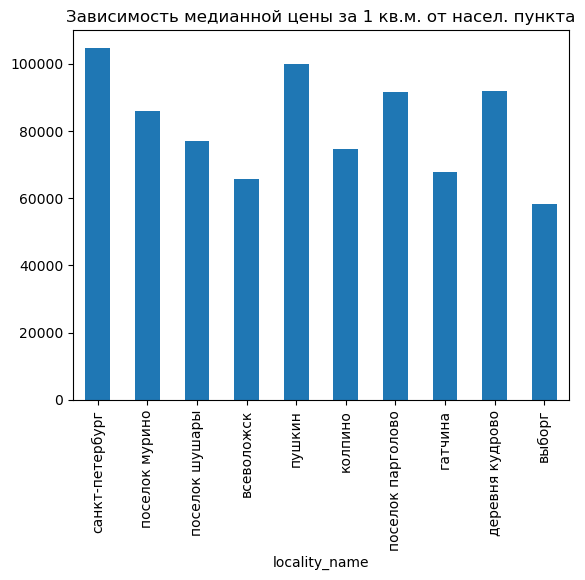

In [150]:
#построение стобчатой диаграммы зависимости цены за 1 кв.м от населённого пункта
price_median.plot.bar(title='Зависимость медианной цены за 1 кв.м. от насел. пункта');

**Вывод**

Из полученных данных видно, что наибольшая цена за 1 кв.метр среди 10 самых популярных населённых пунктов - это Санкт-Петербург, что в принципе логично: центр области, центр агломерации и второй город по населению в РФ.

Наименьшая цена за 1 кв. метр наблюдается в Выборге, что тоже можно признать логичным: это не агломерация Санкт-Петербурга, самый дальний из представленных городов от СПб. 

##### Исследование зависимости стоимости объектов от расстояния до центра Сантк-Петербурга.

In [151]:
#Подсчёт сводной таблицы, показывающей зависимость медианной стоимости жилья 
#от расстояния до центра Санкт-Петербурга
price_to_cityCenter=pd.pivot_table(data[data['locality_name']=='санкт-петербург'],\
                                   values='last_price', index='cityCenter_km',aggfunc='median')

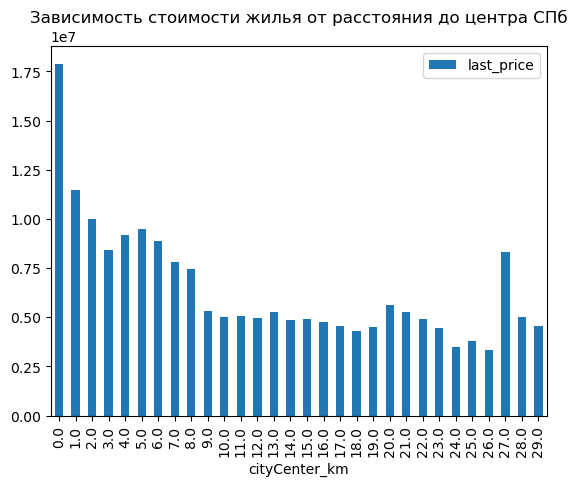

In [152]:
price_to_cityCenter.plot.bar(title = 'Зависимость стоимости жилья от расстояния до центра СПб');

**Вывод**

Из полученных данных заметен общий тренд: чем ближе к центру Санкт-Петербурга, тем дороже жильё. Однако есть и особенности: второй по значимости пик находится в районе 6 км от центра, а также есть выделяющееся значение на 27 км от центра.

С чем ближе к центру тем дороже - всё понятно, это в целом логично.

Пик на 6 км от центра города может быть обусловлен местными условиями (например, существует район элитного жилья - Крестовский остров), также есть географические особенности: город расположен на островах и возможны провалы в стоимости в районах, где может быть промышленная застройка. Также провал на 3 км может быть объяснён обилием дешёвого жилья в центре, но среди старых домов, которые могут быть без ремонта, быть в аварийном состоянии и так далее.

Пик на 27 км возможно объяснить тем, что по сути это уже загород, и там могут находиться ближайшие к городу элитные посёлки (аналогично Барвихе в Москве например).


### Общий вывод

**Основная тема исследования:** Изучение данных о рынке недвижимости и нахождение особенностей и зависимостей.

**Краткое описание проведённых действий:** 

Выполнена предобработка данных (заполнены по возможности пропуски, исключены дубликаты и аномальные значения);

Произведены дополнительные вычисления (цена одного квадратного метра, день недели публикации объявления, а также месяц, год, тип этажа квартиры (первый, последний, другой);

Проведён исследовательский анализ данных: изучение зависимостей цены объекта от различных параметров объекта.

**Основные выводы:**

1. Обработка пропусков имеет очень важное значение: некоторые некорректные выбросы на итоговых результатах порождены именно этим.
2. Интересна корреляция между стоимостью объекта и его полной площадью, жилой площадью и площадью кухни: прямая пропорциональная зависимость имеет место скорее для минимальной цены объекта, тогда как отличные от минимальных цен уже не коррелируют с величной площадей напрямую.
3. Интересна зависимость стоимости от комнатности: от студий и до 3-комнатных квартир стоимость растёт пропорционально количеству комнат, тогда как между 3,4,5-комнатными квартирами разница в стоимости незначительна, а дальше при росте числа комнат (от 6 до 11) цена объекта показывает снижение.
4. Зависимость стоимости объекта от этажа расположения показала следующие зависимости: до 10 этажей стоимость выше, чем от 10 до 25. Возможно, это коррелирует с классом жилья (элитное и в центре, среди невысоких домов - этажность меньше), а для более дешёвых квартир этажность больше (возможно это уже эконом класс вне центра, где можно строить дома какой угодно высоты.)
5. Между днём публикации и стоимостью особой корреляции нет, между месяцами - тоже. Однако, количество объявлений сильно меняется от месяца к месяцу (вкратце - летом снижение, осенью - пик)
6. Расстояние от центра города в принципе влияет довольно объяснимо: чем ближе к центру, тем дороже объекты. Однако существуют и другие районы с элитным жильём, где цена выше, а расстояние порядка 6 км (на 6 км квартира дороже, чем на 3 км).

**Общие рекомендации:** 

Среди имеющихся данных присутствуют пропуски, которые наиболее критично повлияли на результаты исследования: это расстояния до ближайшего аэропорта, парка и пруда. Возможно, в наборе этих исходных данных можно что-то улучшить. 

Основные выводы в целом логичны: чем ближе к центру - тем дороже и тд, но существуют и интересные особенности, такие как то, что цена объекта в течение года не меняется, тогда как количество объявлений имеет динамичные изменения в течение года.


    
При исключении заполнения пропусков для столбца с расстояниями до ближайших парков, гистограмма распределения показала, что для тех квартир, вокруг которых парки вообще есть, с большой вероятностью они находятся на расстоянии примерно от 0 до 700 метров. 
Также была диаграмма зависимости стоимости от расстояния (при пересчёте со среднего на медиану): провал на 3 км стал не таким выделяющимся, но в целом выводы остаются верными.
И ещё отменил заполнение пропусков в столбце с длительностью публикации: заполнять их было бы не совсем корректно на самом деле.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод